In [1]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split

import optuna
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
data=pd.read_csv(r'application.csv')

In [3]:
data_sample = data.sample(frac=0.1, random_state=42)

In [4]:
data_sample.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,0.4167,0.2917,0.0735,0.0601,0.0844,0.0058,0.1118,0.0756,0.0566,0.9940,0.9216,0.0523,0.0806,0.0345,0.3333,0.0417,0.0445,0.0652,0.0857,0.0,0.0000,0.0760,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
36463,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0

In [9]:
data_sample.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,30751.000000,30751.000000,30751,30751,30751,30751,30751.000000,3.075100e+04,3.075100e+04,30749.000000,3.072100e+04,30627,30751,30751,30751,30751,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,10410.000000,30751.0,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,21106,30750.000000,30751.000000,30751.000000,30751,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751,13266.000000,30686.000000,24643.000000,15148.000000,12755.000000,15715.000000,10420.000000,9351.000000,14381.000000,15217.000000,15408.000000,9959.000000,12528.000000,9819.000000,15310.000000,9495.000000,13836.000000,15148.000000,12755.000000,15715.000000,10420.000000,9351.000000,14381.000000,15217.000000,15408.000000,9959.000000,12528.000000,9819.000000,15310.000000,9495.000000,13836.000000,15148.000000,12755.000000,15715.000000,10420.000000,9351.000000,14381.000000,15217.000000,15408.000000,9959.000000,12528.000000,9819.000000,15310.000000,9495.000000,13836.000000,9816,15305,15872.000000,15097,16154,30643.000000,30643.000000,30643.00000,30643.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,26598.000000,26598.000000,26598.000000,26598.000000,26598.000000,26598.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,7,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,

In [11]:
data_sample['AGE'] = (-data_sample['DAYS_BIRTH'] / 365).astype(int)

In [13]:
data_sample.drop(['SK_ID_CURR', 'DAYS_BIRTH'], axis=1, inplace=True)

In [15]:
data_sample['CODE_GENDER'].value_counts()

CODE_GENDER
F      20365
M      10385
XNA        1
Name: count, dtype: int64

In [17]:
data_sample['CODE_GENDER'] = data_sample['CODE_GENDER'].replace('XNA', np.nan)

In [19]:
data_sample.isnull().sum()

TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         1
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         2
AMT_GOODS_PRICE                    30
NAME_TYPE_SUITE                   124
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     20341
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_T

In [21]:
threshold = 0.3
cols_to_drop = data_sample.columns[data_sample.isnull().sum() / len(data_sample) > threshold].tolist()

cols_to_drop

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [23]:
data_sample.drop(columns=cols_to_drop, inplace=True)

In [25]:
data_sample.describe(include='all')

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,30751.000000,30751,30750,30751,30751,30751.000000,3.075100e+04,3.075100e+04,30749.000000,3.072100e+04,30627,30751,30751,30751,30751,30751.000000,30751.000000,30751.000000,30751.000000,30751.0,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30750.000000,30751.000000,30751.000000,30751,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751,30686.000000,24643.000000,30643.000000,30643.000000,30643.00000,30643.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,30751.000000,26598.000000,26598.000000,26598.000000,26598.000000,26598.000000,26598.000000,30751.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,7,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,27837,20365,20340,21130,NaN,NaN,NaN,NaN,NaN,24900,15972,21936,19576,27211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.081916,NaN,NaN,NaN,NaN,0.417027,1.714636e+05,5.979197e+05,27100.553758,5.372726e+05,NaN,NaN,NaN,NaN,NaN,0.020954,63592.480570,-4986.327664,-2992.875093,1.0,0.820559,0.201750,0.997886,0.280869,0.054925,2.150959,2.052258,2.031316,NaN,12.049397,0.015512,0.051380,0.041365,0.077103,0.231927,0.181815,NaN,0.513726,0.508517,1.430898,0.145743,1.41432,0.102307,-960.288478,0.000130,0.707424,0.000130,0.014471,0.087802,0.000098,0.083965,0.004260,0.000065,0.004423,0.000033,0.003772,0.002927,0.001528,0.009821,0.000423,0.008227,0.000683,0.000618,0.000390,0.006542,0.008234,0.035266,0.270772,0.260922,1.881307,43.417612
std,0.274241,NaN,NaN,NaN,NaN,0.723048,6.733772e+05,4.023690e+05,14547.715041,3.690208e+05,NaN,NaN,NaN,NaN,NaN,0.013916,141080.111821,3532.689832,1507.703735,0.0,0.383728,0.401313,0.045928,0.449431,0.227838,0.914350,0.509839,0.504060,NaN,3.256793,0.123578,0.220776,0.199135,0.2

In [27]:
data_sample.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       1
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       2
AMT_GOODS_PRICE                  30
NAME_TYPE_SUITE                 124
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   1
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY 

In [29]:
lr_rf_knn_data_sample = data_sample.copy()
boost_data_sample = data_sample.copy()

# KNN RF LR

In [32]:
for i in lr_rf_knn_data_sample.columns:
    if lr_rf_knn_data_sample[i].dtype == 'object':
        lr_rf_knn_data_sample[i].fillna(lr_rf_knn_data_sample[i].mode()[0], inplace=True)
    else:
        lr_rf_knn_data_sample[i].fillna(lr_rf_knn_data_sample[i].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_10528\1208736161.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lr_rf_knn_data_sample[i].fillna(lr_rf_knn_data_sample[i].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\1208736161.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [34]:
segment_mapping = {
    "Lower secondary": 1,
    "Secondary / secondary special": 2,
    "Incomplete higher": 3,
    "Higher education": 4,
    "Academic degree": 5,
}
lr_rf_knn_data_sample["NAME_EDUCATION_TYPE"] = lr_rf_knn_data_sample["NAME_EDUCATION_TYPE"].map(segment_mapping)

In [36]:
encoders = {}
for i in lr_rf_knn_data_sample.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    lr_rf_knn_data_sample[i] = le.fit_transform(lr_rf_knn_data_sample[i])
    encoders[i] = le

In [38]:
encoders

{'NAME_CONTRACT_TYPE': LabelEncoder(),
 'CODE_GENDER': LabelEncoder(),
 'FLAG_OWN_CAR': LabelEncoder(),
 'FLAG_OWN_REALTY': LabelEncoder(),
 'NAME_TYPE_SUITE': LabelEncoder(),
 'NAME_INCOME_TYPE': LabelEncoder(),
 'NAME_FAMILY_STATUS': LabelEncoder(),
 'NAME_HOUSING_TYPE': LabelEncoder(),
 'WEEKDAY_APPR_PROCESS_START': LabelEncoder(),
 'ORGANIZATION_TYPE': LabelEncoder()}

In [40]:
lr_data_sample = lr_rf_knn_data_sample.copy()
rf_data_sample = lr_rf_knn_data_sample.copy()
knn_data_sample = lr_rf_knn_data_sample.copy()

## LR

In [43]:
for var in lr_data_sample.columns:
    if var == 'TARGET':
        continue  

    if lr_data_sample[var].dtypes != object:
        
        q1 = lr_data_sample[var].quantile(0.25)
        q2 = lr_data_sample[var].quantile(0.5)
        q3 = lr_data_sample[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        lr_data_sample['category_' + var] = pd.cut(lr_data_sample[var], bins=ranges, duplicates='drop')

        grouped = lr_data_sample.groupby(['category_' + var, 'TARGET'])['TARGET'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        lr_data_sample = lr_data_sample.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)

    elif lr_data_sample[var].dtypes == object:

        grouped = lr_data_sample.groupby([var, 'TARGET'])['TARGET'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        lr_data_sample = lr_data_sample.merge(grouped[[var, var + '_woe']], how='left', on=var)
        


C:\Users\admin\AppData\Local\Temp\ipykernel_10528\3856496952.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = lr_data_sample.groupby(['category_' + var, 'TARGET'])['TARGET'].count().unstack().reset_index()
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\3856496952.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = lr_data_sample.groupby(['category_' + var, 'TARGET'])['TARGET'].count().unstack().reset_index()
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\3856496952.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

In [44]:
lr_data_sample.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,category_NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE_woe,category_CODE_GENDER,CODE_GENDER_woe,category_FLAG_OWN_CAR,FLAG_OWN_CAR_woe,category_FLAG_OWN_REALTY,FLAG_OWN_REALTY_woe,category_CNT_CHILDREN,CNT_CHILDREN_woe,category_AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_woe,category_AMT_CREDIT,AMT_CREDIT_woe,category_AMT_ANNUITY,AMT_ANNUITY_woe,category_AMT_GOODS_PRICE,AMT_GOODS_PRICE_woe,category_NAME_TYPE_SUITE,NAME_TYPE_SUITE_woe,category_NAME_INCOME_TYPE,NAME_INCOME_TYPE_woe,category_NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE_woe,category_NAME_FAMILY_STATUS,NAME_FAMILY_STATUS_woe,category_NAME_HOUSING_TYPE,NAME_HOUSING_TYPE_woe,category_REGION_POPULATION_RELATIVE,REGION_POPULATION_RELATIVE_woe,category_DAYS_EMPLOYED,DAYS_EMPLOYED_woe,category_DAYS_REGISTRATION,DAYS_REGISTRATION_woe,category_DAYS_ID_PUBLISH,DAYS_ID_PUBLISH_woe,category_FLAG_MOBIL,FLAG_MOBIL_woe,category_FLAG_EMP_PHONE,FLAG_EMP_PHONE_woe,category_FLAG_WORK_PHONE,FLAG_WORK_PHONE_woe,category_FLAG_CONT_MOBILE,FLAG_CONT_MOBILE_woe,category_FLAG_PHONE,FLAG_PHONE_woe,category_FLAG_EMAIL,FLAG_EMAIL_woe,category_CNT_FAM_MEMBERS,CNT_FAM_MEMBERS_woe,category_REGION_RATING_CLIENT,REGION_RATING_CLIENT_woe,category_REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY_woe,category_WEEKDAY_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START_woe,category_HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_woe,category_REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_LIVE_REGION_woe,category_REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION_woe,category_LIVE_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION_woe,category_REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_LIVE_CITY_woe,category_REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY_woe,category_LIVE_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY_woe,category_ORGANIZATION_TYPE,ORGANIZATION_TYPE_woe,category_EXT_SOURCE_2,EXT_SOURCE_2_woe,category_EXT_SOURCE_3,EXT_SOURCE_3_woe,category_OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE_woe,category_DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE_woe,category_OBS_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE_woe,category_DEF_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE_woe,category_DAYS_LAST_PHONE_CHANGE,DAYS_LAST_PHONE_CHANGE_woe,category_FLAG_DOCUMENT_2,FLAG_DOCUMENT_2_woe,category_FLAG_DOCUMENT_3,FLAG_DOCUMENT_3_woe,category_FLAG_DOCUMENT_4,FLAG_DOCUMENT_4_woe,category_FLAG_DOCUMENT_5,FLAG_DOCUMENT_5_woe,category_FLAG_DOCUMENT_6,FLAG_DOCUMENT_6_woe,category_FLAG_DOCUMENT_7,FLAG_DOCUMENT_7_woe,category_FLAG_DOCUMENT_8,FLAG_DOCUMENT_8_woe,category_FLAG_DOCUMENT_9,FLAG_DOCUMENT_9_woe,category_FLAG_DOCUMENT_10,FLAG_DOCUMENT_10_woe,category_FLAG_DOCUMENT_11,FLAG_DOCUMENT_11_woe,category_FLAG_DOCUMENT_12,FLAG_DOCUMENT_12_woe,categor

In [45]:
lr_data_sample.isnull().sum()

TARGET                                  0
NAME_CONTRACT_TYPE                      0
CODE_GENDER                             0
FLAG_OWN_CAR                            0
FLAG_OWN_REALTY                         0
CNT_CHILDREN                            0
AMT_INCOME_TOTAL                        0
AMT_CREDIT                              0
AMT_ANNUITY                             0
AMT_GOODS_PRICE                         0
NAME_TYPE_SUITE                         0
NAME_INCOME_TYPE                        0
NAME_EDUCATION_TYPE                     0
NAME_FAMILY_STATUS                      0
NAME_HOUSING_TYPE                       0
REGION_POPULATION_RELATIVE              0
DAYS_EMPLOYED                           0
DAYS_REGISTRATION                       0
DAYS_ID_PUBLISH                         0
FLAG_MOBIL                              0
FLAG_EMP_PHONE                          0
FLAG_WORK_PHONE                         0
FLAG_CONT_MOBILE                        0
FLAG_PHONE                        

In [49]:
numeric_cols = lr_data_sample.select_dtypes(include=[np.number]).columns

categorical_cols = lr_data_sample.select_dtypes(include=['object']).columns


for col in numeric_cols:
    if lr_data_sample[col].isnull().sum() > 0:
        lr_data_sample[col].fillna(lr_data_sample[col].median(), inplace=True)

for col in categorical_cols:
    if lr_data_sample[col].isnull().sum() > 0:
        lr_data_sample[col].fillna(lr_data_sample[col].mode()[0] if not lr_data_sample[col].mode().empty else 'Unknown', inplace=True)

lr_data_sample.isnull().sum()

TARGET                                  0
NAME_CONTRACT_TYPE                      0
CODE_GENDER                             0
FLAG_OWN_CAR                            0
FLAG_OWN_REALTY                         0
CNT_CHILDREN                            0
AMT_INCOME_TOTAL                        0
AMT_CREDIT                              0
AMT_ANNUITY                             0
AMT_GOODS_PRICE                         0
NAME_TYPE_SUITE                         0
NAME_INCOME_TYPE                        0
NAME_EDUCATION_TYPE                     0
NAME_FAMILY_STATUS                      0
NAME_HOUSING_TYPE                       0
REGION_POPULATION_RELATIVE              0
DAYS_EMPLOYED                           0
DAYS_REGISTRATION                       0
DAYS_ID_PUBLISH                         0
FLAG_MOBIL                              0
FLAG_EMP_PHONE                          0
FLAG_WORK_PHONE                         0
FLAG_CONT_MOBILE                        0
FLAG_PHONE                        

In [51]:
def target_correlation(data, target, threshold=0.01):
    
    woe_features = data.filter(regex='_woe$', axis=1) 
    woe_features[target] = data[target] 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(lr_data_sample, 'TARGET')

target_result

C:\Users\admin\AppData\Local\Temp\ipykernel_10528\4150246243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_features[target] = data[target]


,Variable,Correlation with Target
0,NAME_CONTRACT_TYPE_woe,-0.027816
1,CODE_GENDER_woe,-0.059751
2,FLAG_OWN_CAR_woe,-0.018751
3,CNT_CHILDREN_woe,-0.013736
4,AMT_INCOME_TOTAL_woe,-0.027778
5,AMT_CREDIT_woe,-0.038529
6,AMT_ANNUITY_woe,-0.037512
7,AMT_GOODS_PRICE_woe,-0.057014
8,NAME_INCOME_TYPE_woe,-0.047198
9,NAME_EDUCATION_TYPE_woe,-0.058565


In [52]:
def intercorrelation(data, target, threshold=0.7):
    
    woe_features = data.filter(regex='_woe$', axis=1) 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
   # print(correlated_pairs_set)
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

# Example usage
intercorrelated_result = intercorrelation(lr_data_sample, 'TARGET')
intercorrelated_result


,Variable 1,Variable 2
0,AMT_REQ_CREDIT_BUREAU_HOUR_woe,AMT_REQ_CREDIT_BUREAU_DAY_woe
1,AMT_REQ_CREDIT_BUREAU_DAY_woe,AMT_REQ_CREDIT_BUREAU_WEEK_woe
2,AMT_REQ_CREDIT_BUREAU_DAY_woe,AMT_REQ_CREDIT_BUREAU_QRT_woe
3,CNT_CHILDREN_woe,CNT_FAM_MEMBERS_woe
4,DEF_30_CNT_SOCIAL_CIRCLE_woe,DEF_60_CNT_SOCIAL_CIRCLE_woe
5,AMT_REQ_CREDIT_BUREAU_DAY_woe,AMT_REQ_CREDIT_BUREAU_MON_woe
6,REGION_RATING_CLIENT_woe,REGION_RATING_CLIENT_W_CITY_woe
7,OBS_30_CNT_SOCIAL_CIRCLE_woe,OBS_60_CNT_SOCIAL_CIRCLE_woe
8,REG_REGION_NOT_WORK_REGION_woe,LIVE_REGION_NOT_WORK_REGION_woe
9,AMT_REQ_CREDIT_BUREAU_HOUR_woe,AMT_REQ_CREDIT_BUREAU_WEEK_woe


In [55]:
lr_cols = target_result.Variable.tolist()
lr_cols

['NAME_CONTRACT_TYPE_woe',
 'CODE_GENDER_woe',
 'FLAG_OWN_CAR_woe',
 'CNT_CHILDREN_woe',
 'AMT_INCOME_TOTAL_woe',
 'AMT_CREDIT_woe',
 'AMT_ANNUITY_woe',
 'AMT_GOODS_PRICE_woe',
 'NAME_INCOME_TYPE_woe',
 'NAME_EDUCATION_TYPE_woe',
 'NAME_FAMILY_STATUS_woe',
 'NAME_HOUSING_TYPE_woe',
 'REGION_POPULATION_RELATIVE_woe',
 'DAYS_EMPLOYED_woe',
 'DAYS_REGISTRATION_woe',
 'DAYS_ID_PUBLISH_woe',
 'FLAG_WORK_PHONE_woe',
 'FLAG_PHONE_woe',
 'FLAG_EMAIL_woe',
 'REGION_RATING_CLIENT_woe',
 'REGION_RATING_CLIENT_W_CITY_woe',
 'WEEKDAY_APPR_PROCESS_START_woe',
 'HOUR_APPR_PROCESS_START_woe',
 'REG_CITY_NOT_LIVE_CITY_woe',
 'REG_CITY_NOT_WORK_CITY_woe',
 'LIVE_CITY_NOT_WORK_CITY_woe',
 'ORGANIZATION_TYPE_woe',
 'EXT_SOURCE_2_woe',
 'EXT_SOURCE_3_woe',
 'OBS_30_CNT_SOCIAL_CIRCLE_woe',
 'DEF_30_CNT_SOCIAL_CIRCLE_woe',
 'OBS_60_CNT_SOCIAL_CIRCLE_woe',
 'DEF_60_CNT_SOCIAL_CIRCLE_woe',
 'DAYS_LAST_PHONE_CHANGE_woe',
 'FLAG_DOCUMENT_3_woe',
 'FLAG_DOCUMENT_6_woe',
 'FLAG_DOCUMENT_8_woe',
 'FLAG_DOCUMENT_13_

In [57]:
unique_vars = pd.unique(intercorrelated_result[['Variable 1', 'Variable 2']].values.ravel())
unique_vars_list = list(unique_vars)
unique_vars_sorted = sorted(unique_vars_list)
print(unique_vars_list)

['AMT_REQ_CREDIT_BUREAU_HOUR_woe', 'AMT_REQ_CREDIT_BUREAU_DAY_woe', 'AMT_REQ_CREDIT_BUREAU_WEEK_woe', 'AMT_REQ_CREDIT_BUREAU_QRT_woe', 'CNT_CHILDREN_woe', 'CNT_FAM_MEMBERS_woe', 'DEF_30_CNT_SOCIAL_CIRCLE_woe', 'DEF_60_CNT_SOCIAL_CIRCLE_woe', 'AMT_REQ_CREDIT_BUREAU_MON_woe', 'REGION_RATING_CLIENT_woe', 'REGION_RATING_CLIENT_W_CITY_woe', 'OBS_30_CNT_SOCIAL_CIRCLE_woe', 'OBS_60_CNT_SOCIAL_CIRCLE_woe', 'REG_REGION_NOT_WORK_REGION_woe', 'LIVE_REGION_NOT_WORK_REGION_woe', 'REG_CITY_NOT_WORK_CITY_woe', 'LIVE_CITY_NOT_WORK_CITY_woe']


In [59]:
lr_cols = [var for var in lr_cols if var not in unique_vars_list]
lr_cols

['NAME_CONTRACT_TYPE_woe',
 'CODE_GENDER_woe',
 'FLAG_OWN_CAR_woe',
 'AMT_INCOME_TOTAL_woe',
 'AMT_CREDIT_woe',
 'AMT_ANNUITY_woe',
 'AMT_GOODS_PRICE_woe',
 'NAME_INCOME_TYPE_woe',
 'NAME_EDUCATION_TYPE_woe',
 'NAME_FAMILY_STATUS_woe',
 'NAME_HOUSING_TYPE_woe',
 'REGION_POPULATION_RELATIVE_woe',
 'DAYS_EMPLOYED_woe',
 'DAYS_REGISTRATION_woe',
 'DAYS_ID_PUBLISH_woe',
 'FLAG_WORK_PHONE_woe',
 'FLAG_PHONE_woe',
 'FLAG_EMAIL_woe',
 'WEEKDAY_APPR_PROCESS_START_woe',
 'HOUR_APPR_PROCESS_START_woe',
 'REG_CITY_NOT_LIVE_CITY_woe',
 'ORGANIZATION_TYPE_woe',
 'EXT_SOURCE_2_woe',
 'EXT_SOURCE_3_woe',
 'DAYS_LAST_PHONE_CHANGE_woe',
 'FLAG_DOCUMENT_3_woe',
 'FLAG_DOCUMENT_6_woe',
 'FLAG_DOCUMENT_8_woe',
 'FLAG_DOCUMENT_13_woe',
 'FLAG_DOCUMENT_14_woe',
 'FLAG_DOCUMENT_20_woe',
 'FLAG_DOCUMENT_21_woe',
 'AMT_REQ_CREDIT_BUREAU_YEAR_woe',
 'AGE_woe']

## RF

In [62]:
rf_data_sample.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [64]:
le = LabelEncoder()

for i in knn_data_sample.columns:
    knn_data_sample[i] = le.fit_transform(knn_data_sample[i])


## KNN

In [67]:
knn_data_sample.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

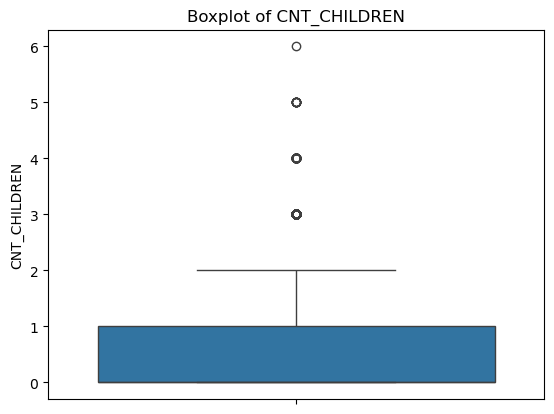

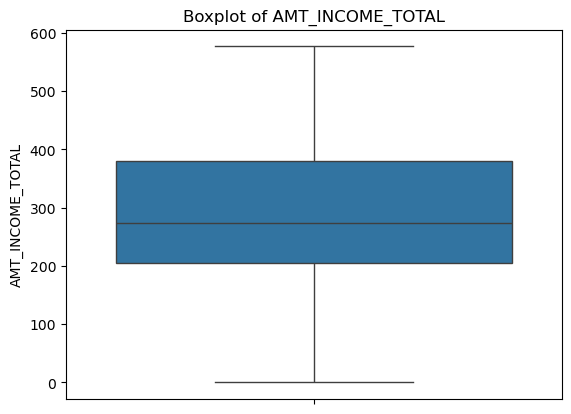

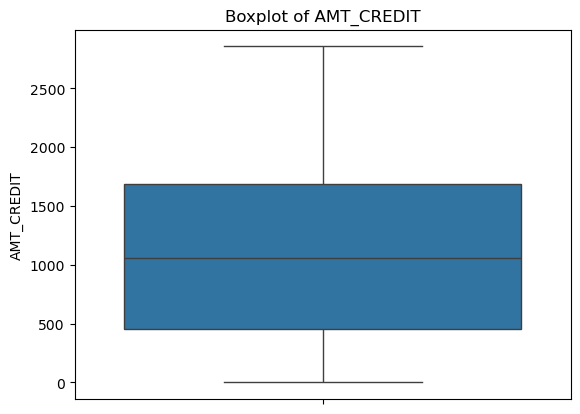

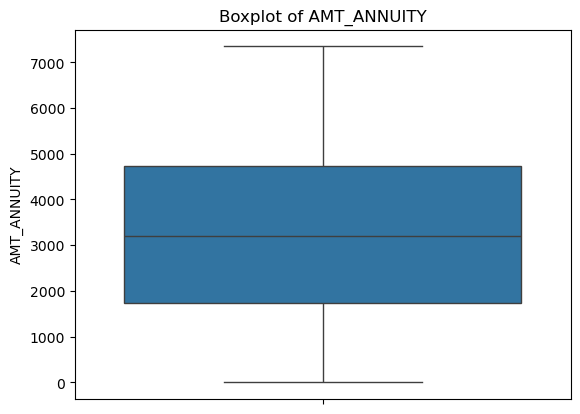

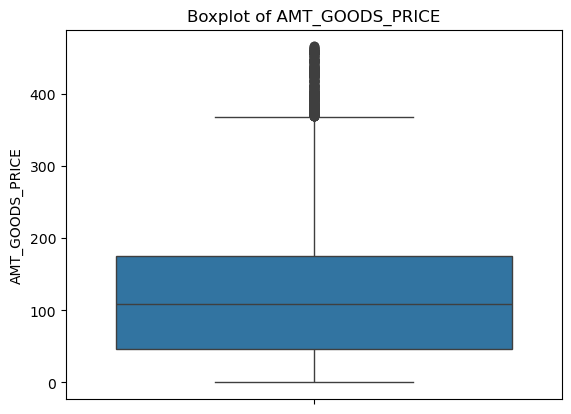

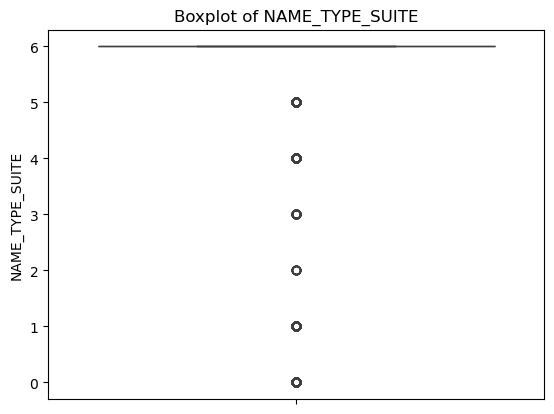

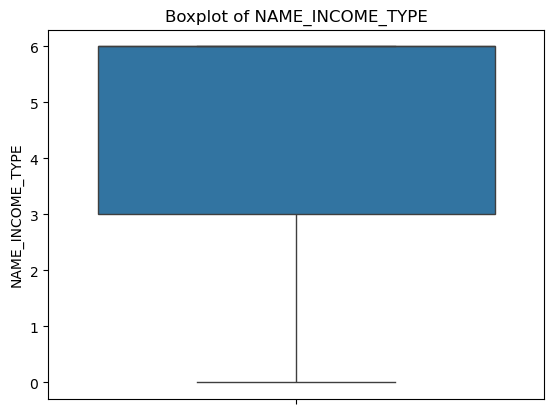

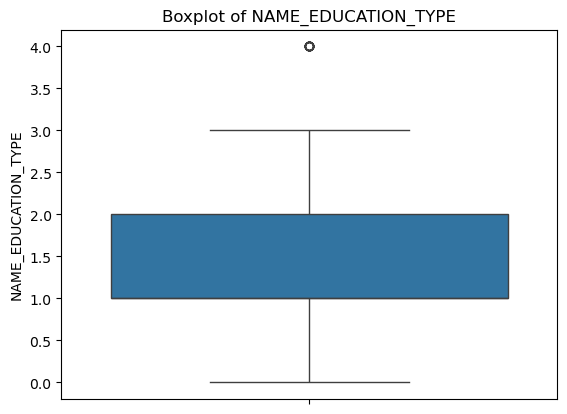

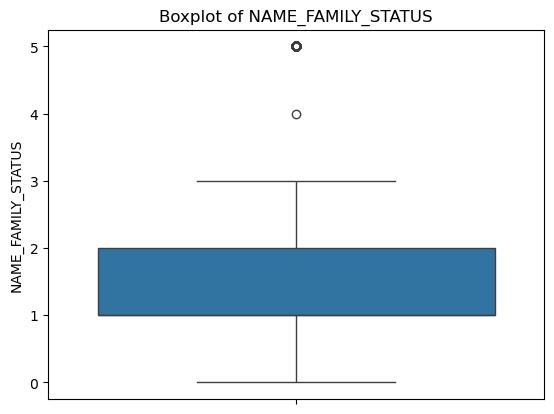

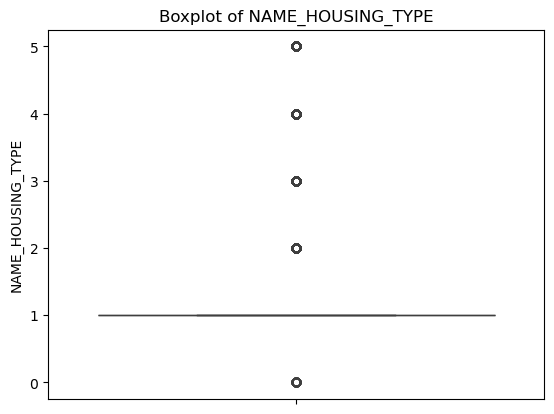

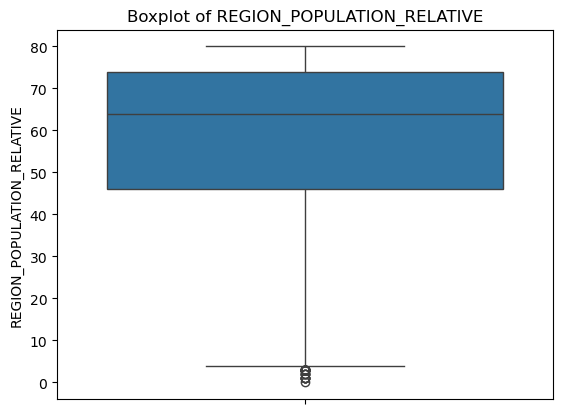

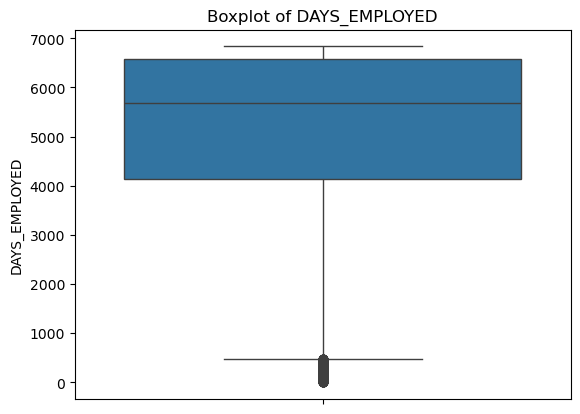

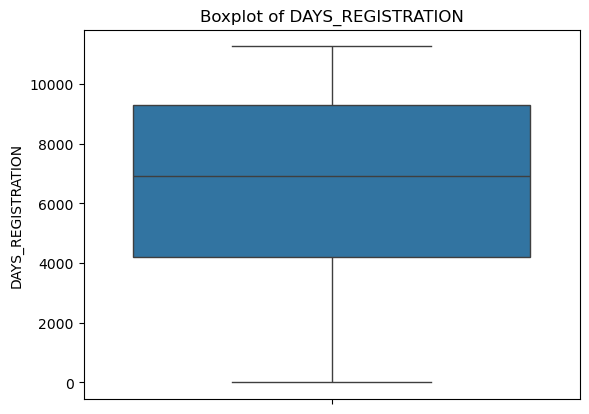

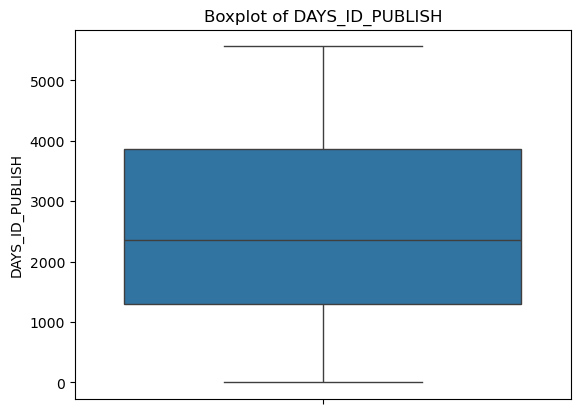

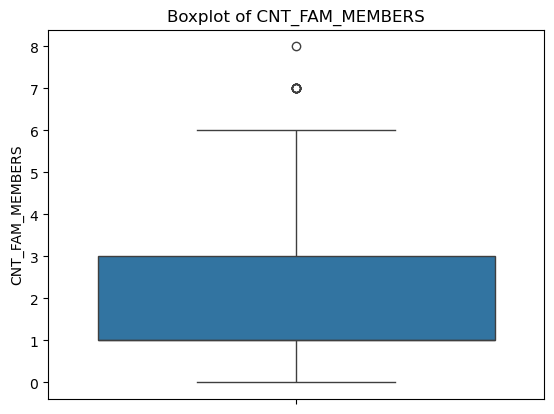

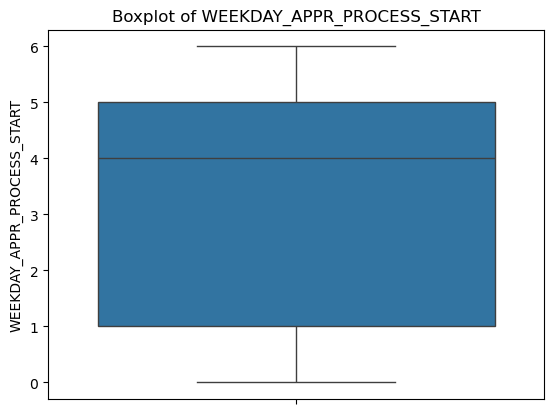

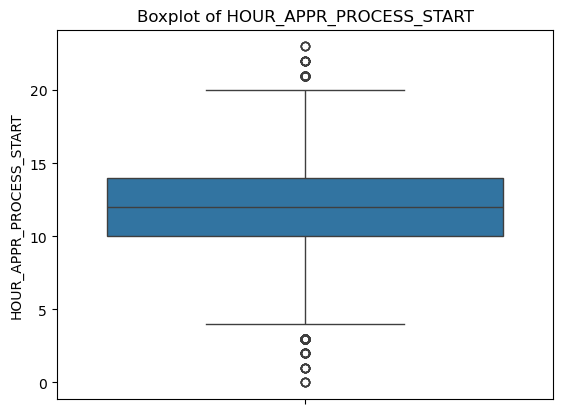

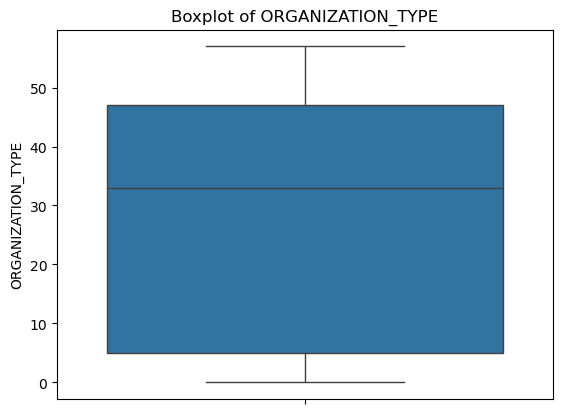

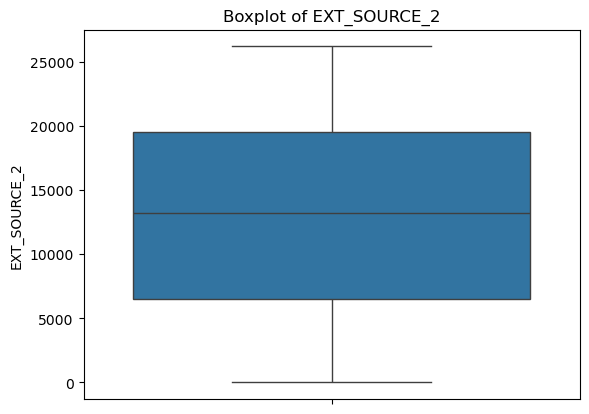

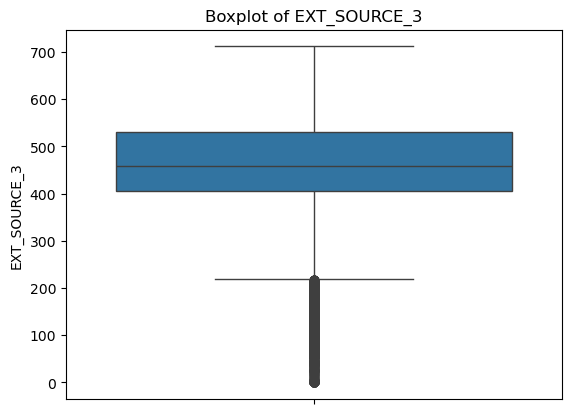

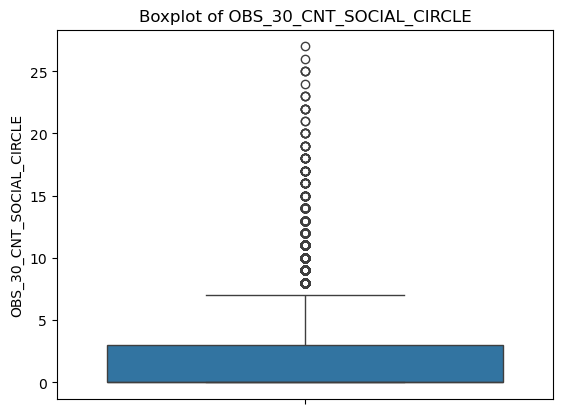

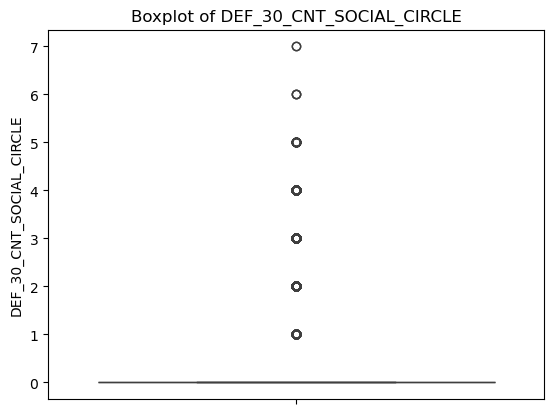

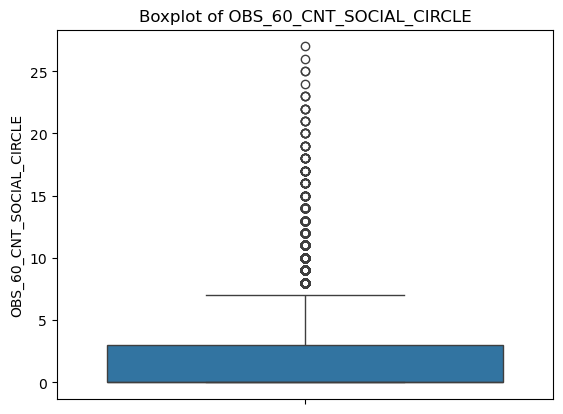

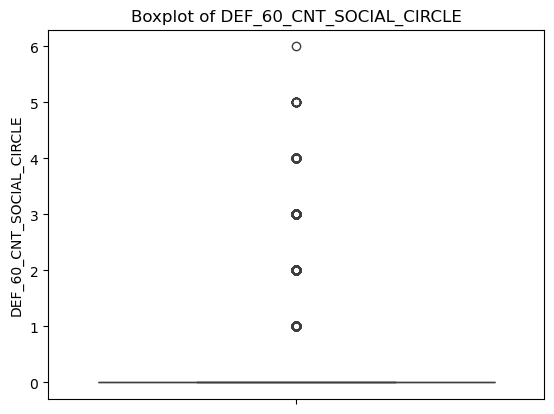

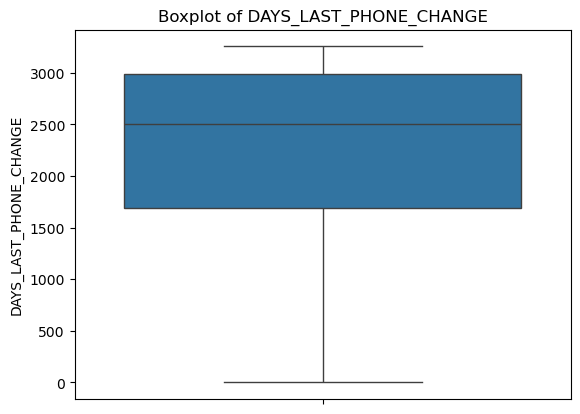

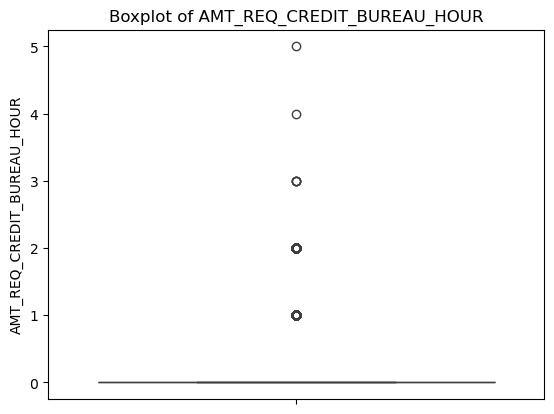

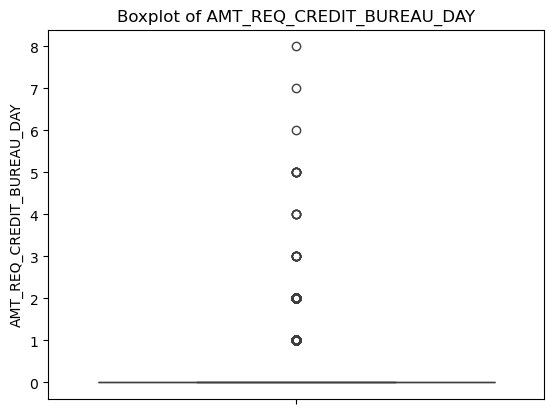

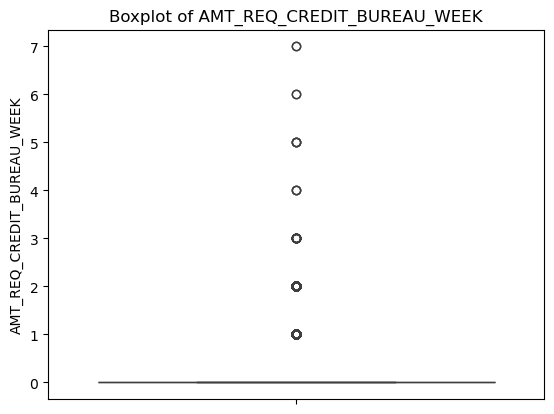

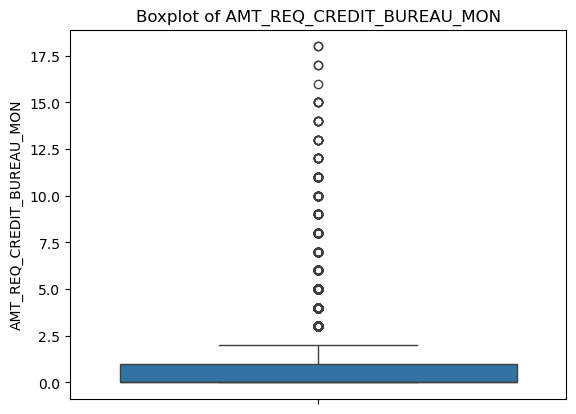

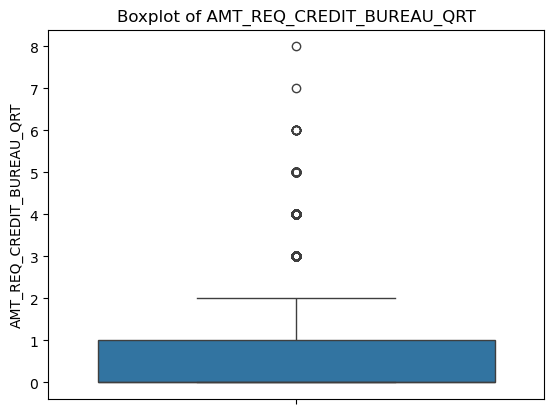

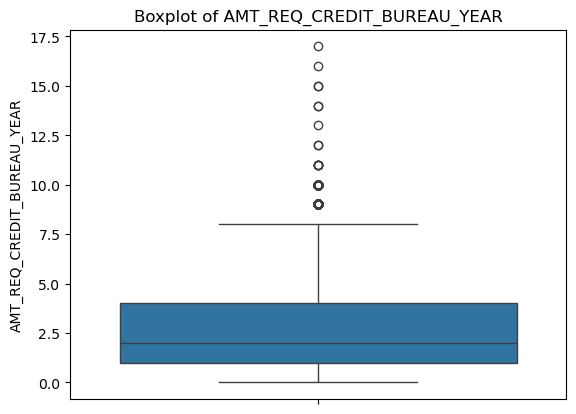

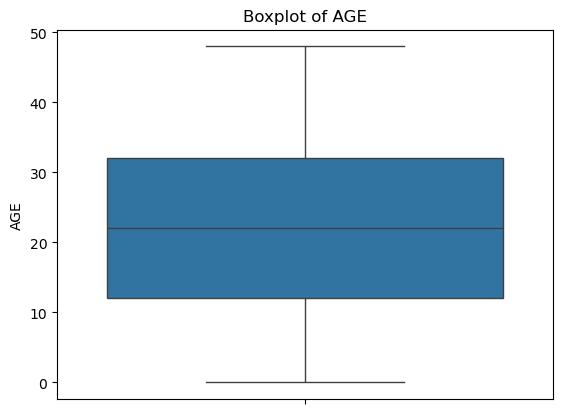

In [69]:
for i in knn_data_sample.columns:
    if (knn_data_sample[i].dtypes != object and 
        i != 'TARGET' and  
        knn_data_sample[i].nunique() > 3):
        sns.boxplot(y=knn_data_sample[i])
        plt.title(f'Boxplot of {i}')
        plt.show()

In [70]:
q1=knn_data_sample.quantile(0.25, numeric_only=True)
q3=knn_data_sample.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

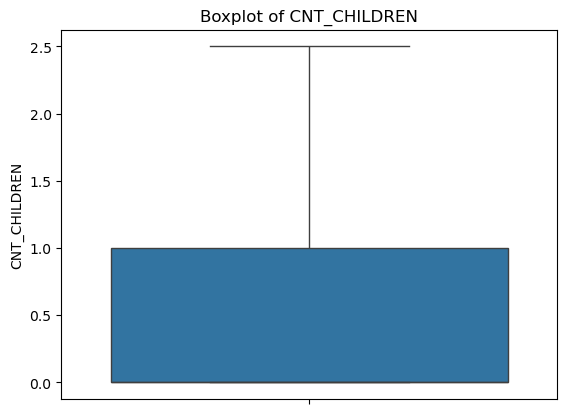

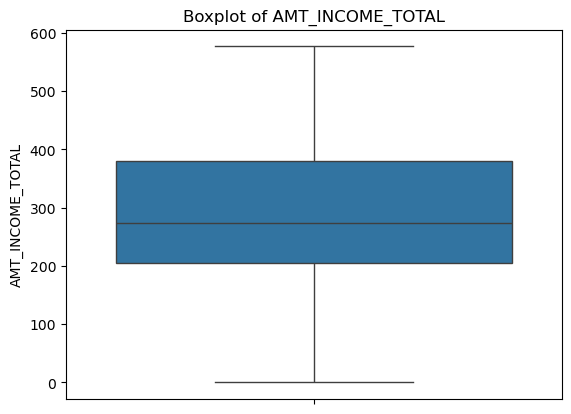

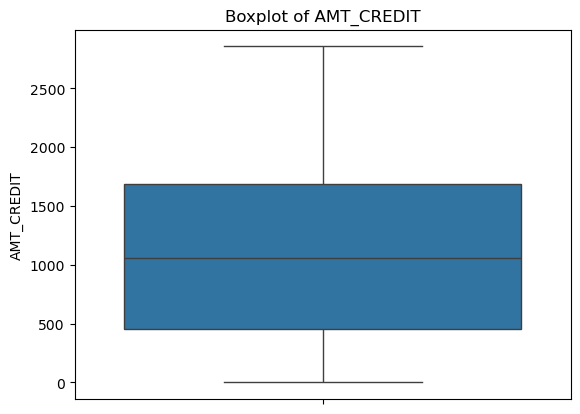

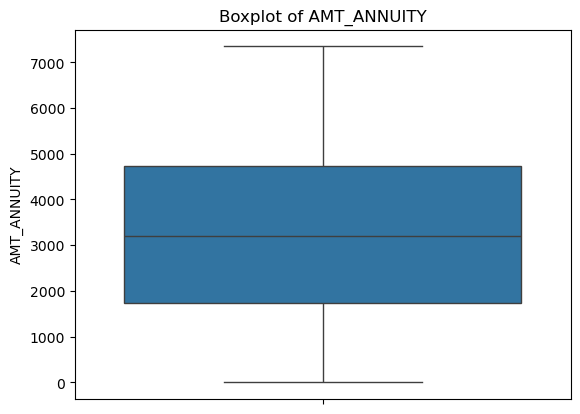

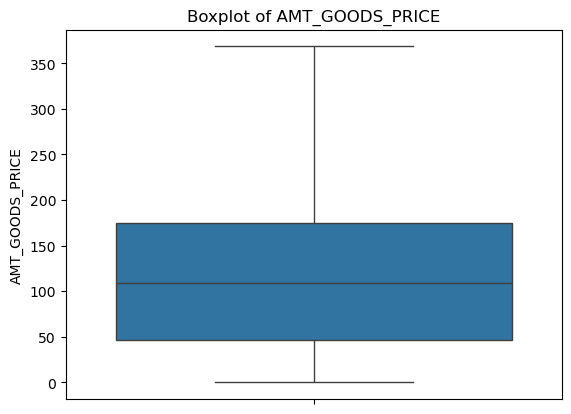

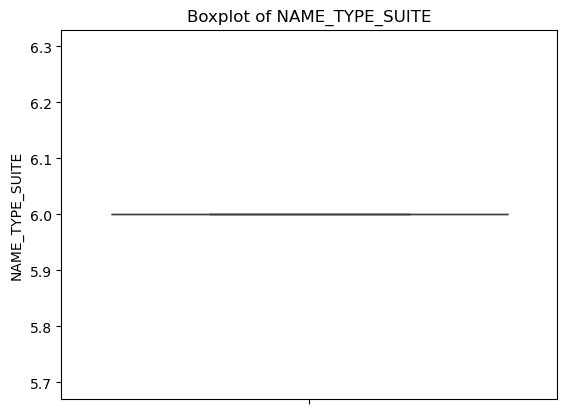

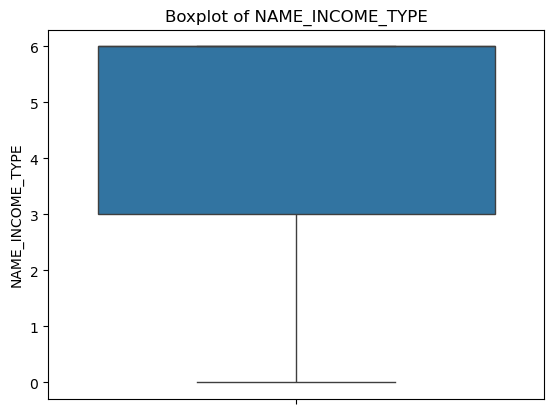

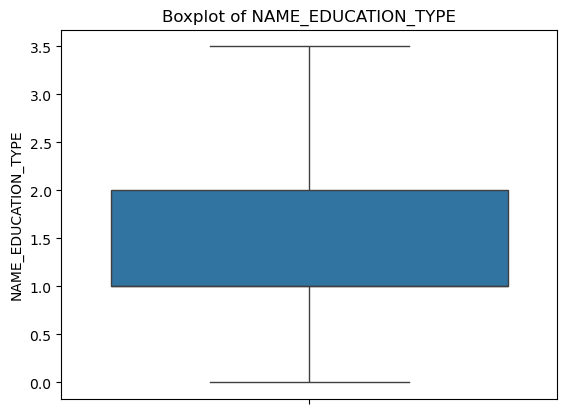

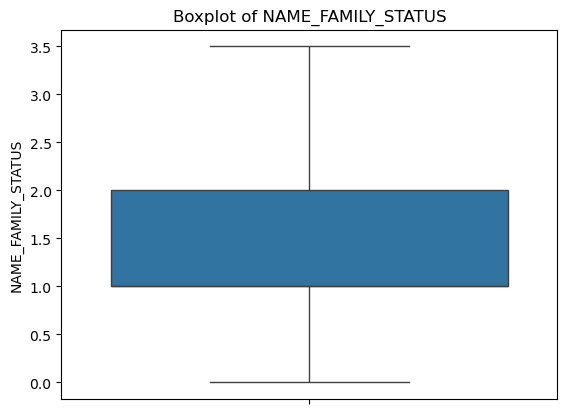

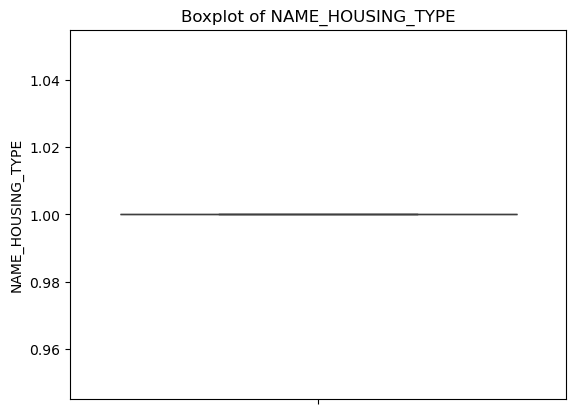

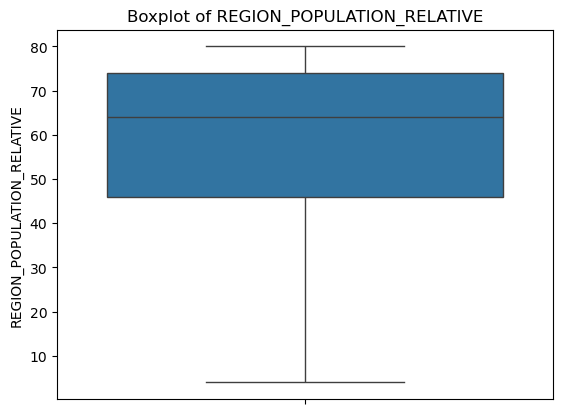

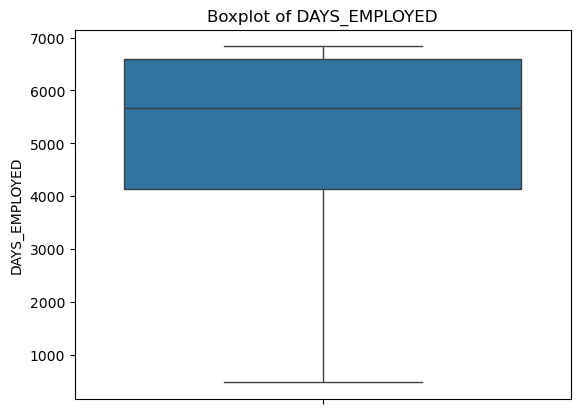

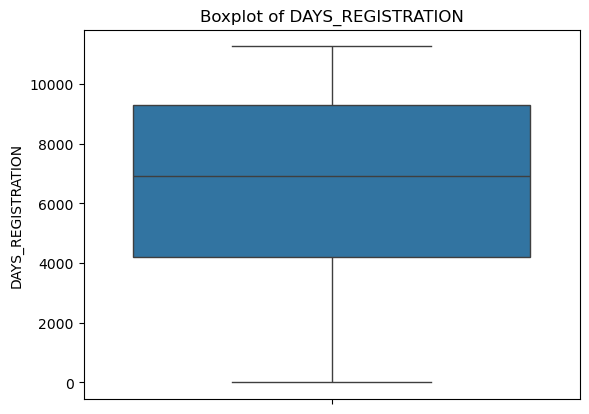

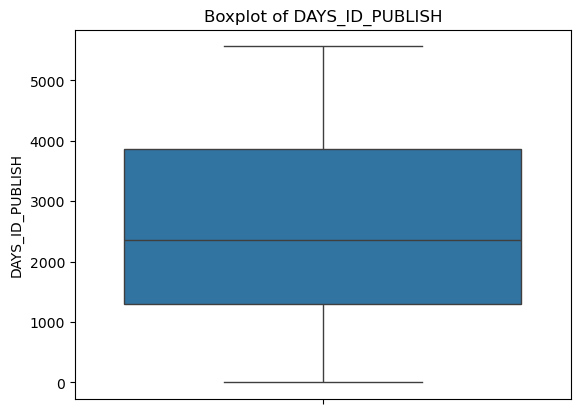

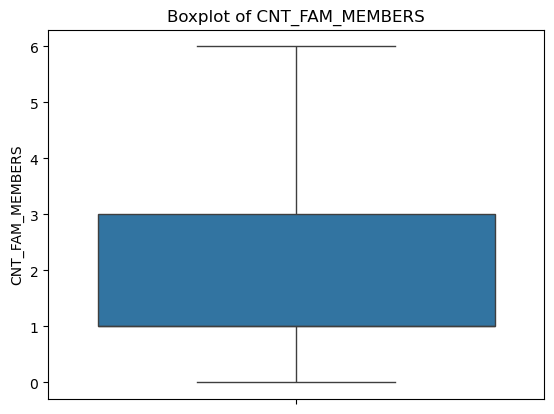

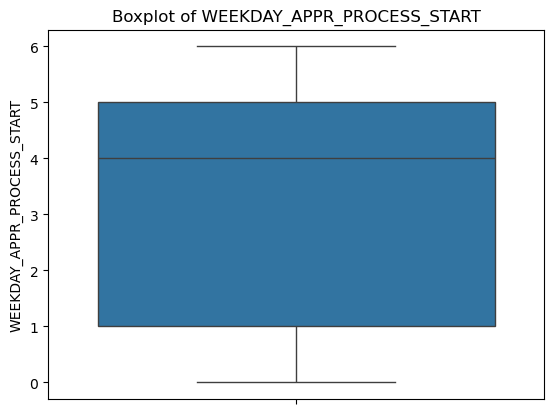

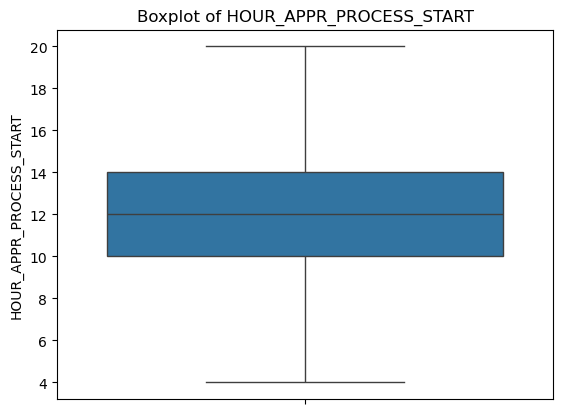

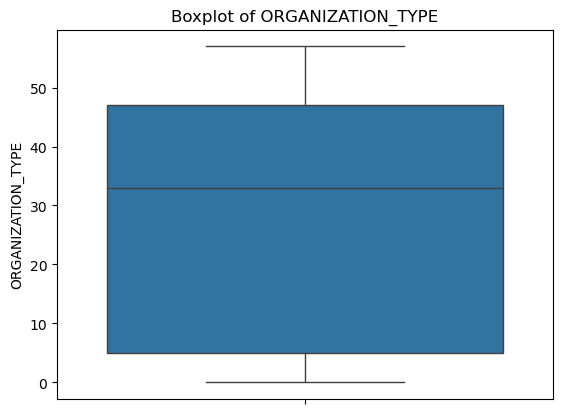

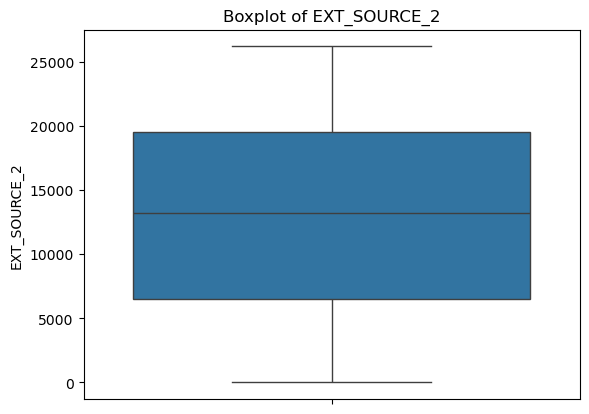

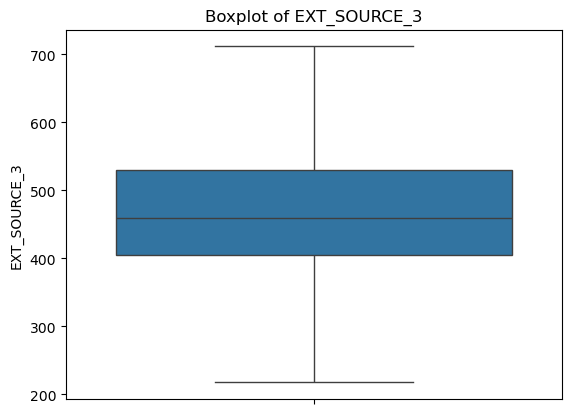

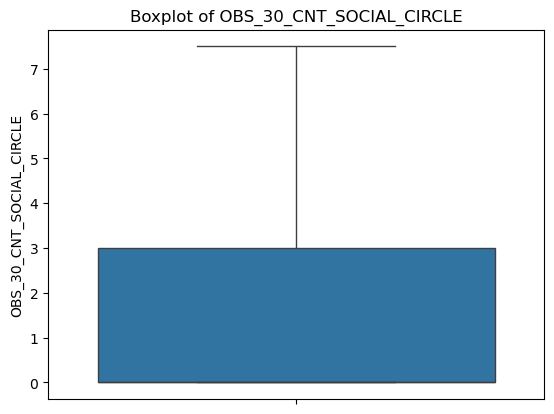

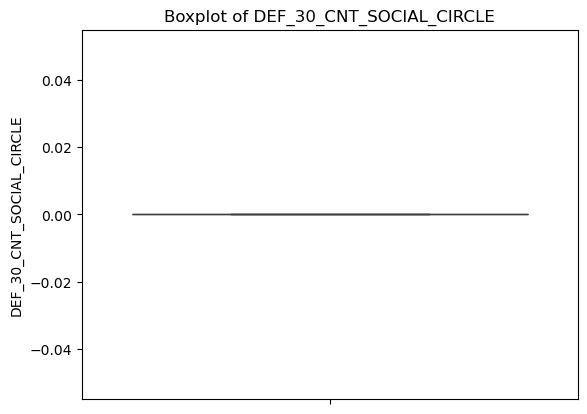

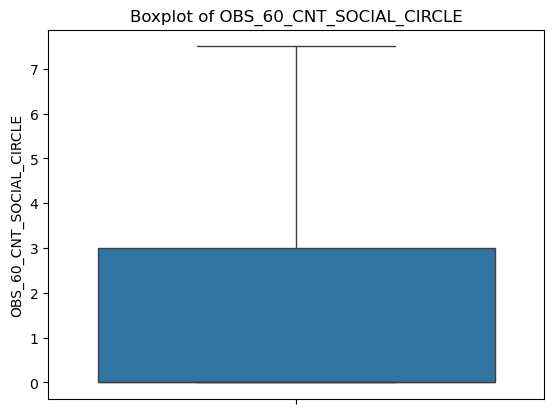

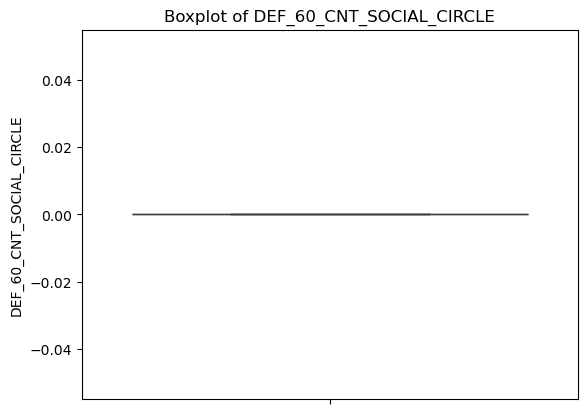

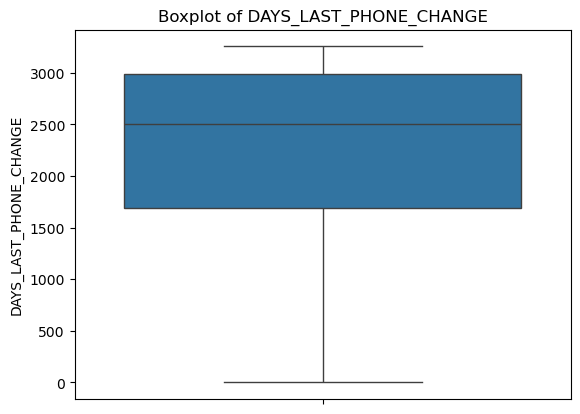

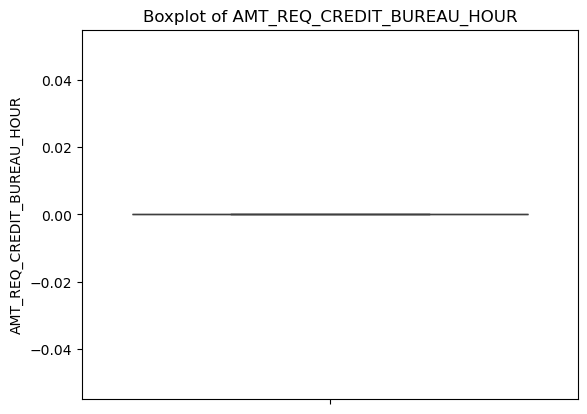

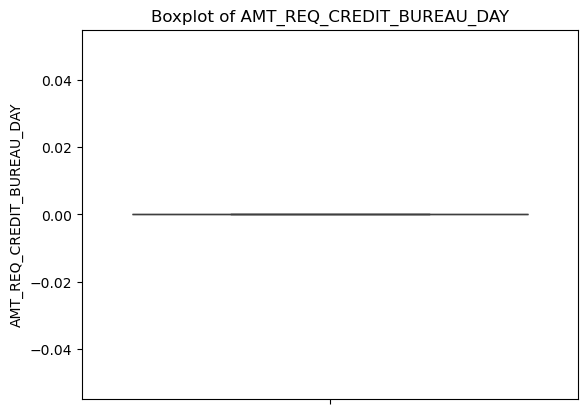

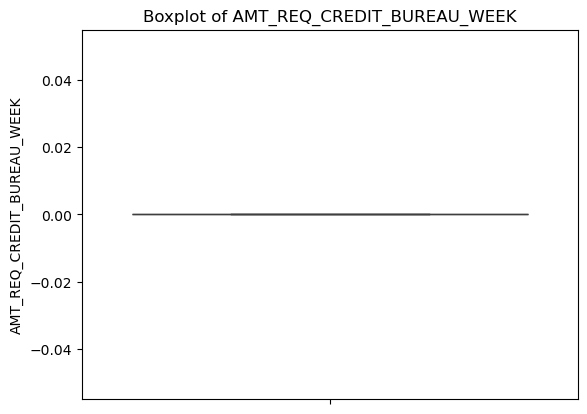

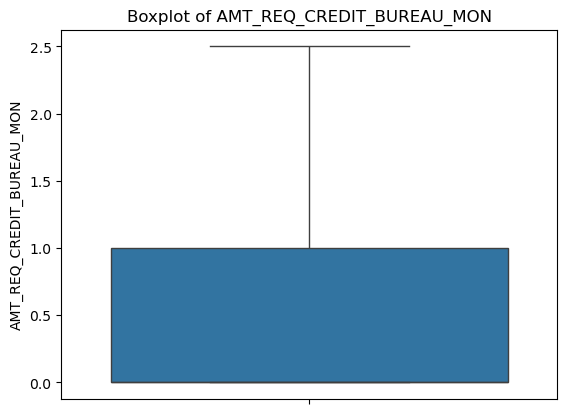

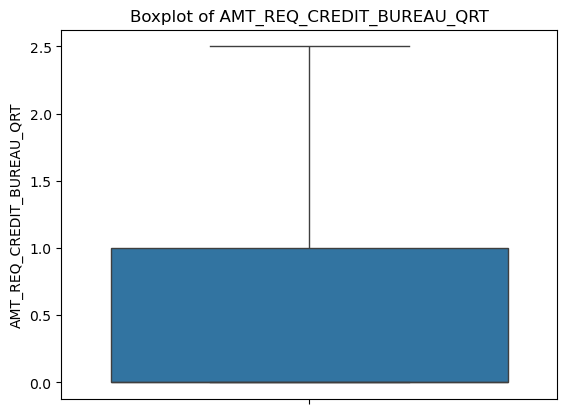

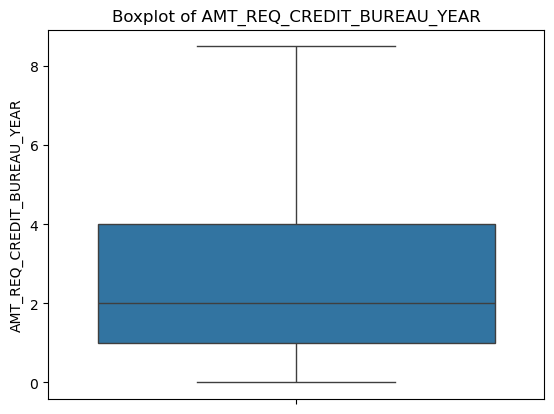

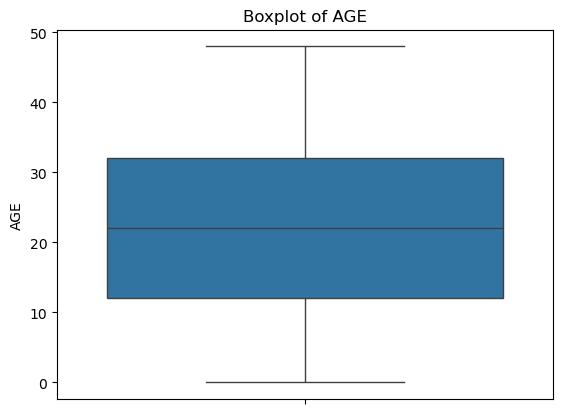

In [73]:
for i in knn_data_sample.columns:
    if (knn_data_sample[i].dtypes != object and 
        i != 'TARGET' and  
        knn_data_sample[i].nunique() > 3):  
        
       
        knn_data_sample[i] = np.where(knn_data_sample[i] > Upper[i], Upper[i], knn_data_sample[i])
        knn_data_sample[i] = np.where(knn_data_sample[i] < Lower[i], Lower[i], knn_data_sample[i])
        
        sns.boxplot(y=knn_data_sample[i])  
        plt.title(f'Boxplot of {i}')
        plt.show()

In [74]:
from scipy import stats

for i in knn_data_sample.columns:
    if knn_data_sample[i].dtype in ['int64', 'float64']: 
        kstest_statistic, kstest_p_value = stats.kstest(knn_data_sample[i], 'norm')
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: TARGET
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: NAME_CONTRACT_TYPE
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: CODE_GENDER
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: FLAG_OWN_CAR
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: FLAG_OWN_REALTY
Kolmogorov-Smirnov Test:
Test Statistic: 0.5284768718530702
p-value: 0.0
Data does not look normally distributed

Column: CNT_CHILDREN
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: AMT_INCOME_TOTAL
Kolmogorov-Smirnov Test:
Test Statistic: 0.9996106168138399
p-value: 0.0
Data does not look normally distributed

Column: AMT_CREDIT
Kolmogorov-Smirnov Test:
Test Statistic: 0.9980496919658675
p-value: 0.0
Data does not look normally dist

In [77]:
def target_correlation(data, target, threshold=0.01):
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target

target_result = target_correlation(knn_data_sample, 'TARGET')

target_result

,Variable,Correlation with Target
0,NAME_CONTRACT_TYPE,-0.027816
1,CODE_GENDER,0.059751
2,FLAG_OWN_CAR,-0.018751
3,CNT_CHILDREN,0.013984
4,AMT_INCOME_TOTAL,-0.023673
5,AMT_CREDIT,-0.011561
6,AMT_GOODS_PRICE,-0.025484
7,NAME_INCOME_TYPE,0.050940
8,NAME_EDUCATION_TYPE,-0.058918
9,REGION_POPULATION_RELATIVE,-0.034154


In [78]:
def intercorrelation(data, target, threshold=0.7):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(knn_data_sample, 'TARGET')

intercorrelated_result

,Variable 1,Variable 2
0,CNT_CHILDREN,CNT_FAM_MEMBERS
1,AMT_CREDIT,AMT_ANNUITY
2,AMT_CREDIT,AMT_GOODS_PRICE
3,AMT_ANNUITY,AMT_CREDIT
4,AMT_ANNUITY,AMT_GOODS_PRICE
5,AMT_GOODS_PRICE,AMT_CREDIT
6,AMT_GOODS_PRICE,AMT_ANNUITY
7,CNT_FAM_MEMBERS,CNT_CHILDREN
8,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
9,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT


In [81]:
target_result.Variable.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE']

In [83]:
def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(knn_data_sample,[
    'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
# 'AMT_INCOME_TOTAL',
 #'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
# 'NAME_EDUCATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
# 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
# 'REGION_RATING_CLIENT',
 #'REGION_RATING_CLIENT_W_CITY',
 #'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 #'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 #'EXT_SOURCE_2',
 #'EXT_SOURCE_3',
# 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 #'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 #'AGE'
]
)

vif_result


,VIF,Features
0,1.188018,NAME_CONTRACT_TYPE
1,1.821900,CODE_GENDER
2,1.804266,FLAG_OWN_CAR
3,1.459281,CNT_CHILDREN
4,2.907452,AMT_GOODS_PRICE
5,4.704478,NAME_INCOME_TYPE
6,7.660346,REGION_POPULATION_RELATIVE
7,9.850656,DAYS_EMPLOYED
8,5.843464,DAYS_REGISTRATION
9,4.110192,DAYS_ID_PUBLISH


In [84]:
vif_result.Features.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [85]:
knn_data_sample.drop(['AMT_INCOME_TOTAL', 'AMT_CREDIT','NAME_EDUCATION_TYPE','FLAG_EMP_PHONE', 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2','EXT_SOURCE_3',
'OBS_30_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_3', 'AGE' ], axis = 1, inplace =True)

In [89]:
for i in knn_data_sample.columns:
    if knn_data_sample[i].dtypes==object:
        print(knn_data_sample[i].value_counts())

In [91]:
knn_data_sample = pd.get_dummies(knn_data_sample, drop_first=True, dtype=int)


In [93]:
knn_data_sample.shape

(30751, 58)

# Boosting models

In [96]:
nb_data_sample = boost_data_sample.copy()
cbc_data_sample = boost_data_sample.copy()

In [98]:
nb_data_sample.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       1
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       2
AMT_GOODS_PRICE                  30
NAME_TYPE_SUITE                 124
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   1
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY 

In [100]:
for i in nb_data_sample.columns:
    nb_data_sample[i] = le.fit_transform(nb_data_sample[i])

In [102]:
for i in cbc_data_sample.columns:
    if cbc_data_sample[i].dtypes==object:
        cbc_data_sample[i].fillna('Missing Value', inplace=True)
        
cbc_data_sample.isnull().sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_10528\2718025105.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cbc_data_sample[i].fillna('Missing Value', inplace=True)


TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       2
AMT_GOODS_PRICE                  30
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   1
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY 

# Model creating

In [105]:
inputs_lr = lr_data_sample[lr_cols]
inputs_knn = knn_data_sample.drop('TARGET', axis=1)
inputs_rf = rf_data_sample.drop('TARGET', axis=1)
inputs_nb = nb_data_sample.drop('TARGET', axis=1)
inputs_cbc = cbc_data_sample.drop('TARGET', axis=1)

In [107]:
output = data_sample['TARGET']

In [109]:
X_train_lr, X_test_lr, y_train, y_test = train_test_split(inputs_lr, output, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train, y_test = train_test_split(inputs_knn, output, test_size=0.2, random_state=42)
X_train_rf, X_test_rf, y_train, y_test = train_test_split(inputs_rf, output, test_size=0.2, random_state=42)
X_train_nb, X_test_nb, y_train, y_test = train_test_split(inputs_nb, output, test_size=0.2, random_state=42)
X_train_cbc, X_test_cbc, y_train, y_test = train_test_split(inputs_cbc, output, test_size=0.2, random_state=42)

In [111]:
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)

        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None

In [112]:
object_columns = [col for col in cbc_data_sample.columns if cbc_data_sample[col].dtypes == 'object']
print(object_columns)


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [115]:
models = []

lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
catboost_model = CatBoostClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42)

catboost_model_cat = CatBoostClassifier(cat_features=object_columns, random_state=42)

models.extend([
    ('LogReg', lr_model),
    ('KNN', knn_model),
    ('RF', rf_model),
    ('XGBoost', xgb_model),
    ('CatBoost', catboost_model),
    ('LightGBM', lightgbm),
    ('CatBoost_Cat', catboost_model_cat)
])

In [117]:
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'LogReg':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_lr, y_train, X_test_lr, y_test)
    elif model_name == 'KNN':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_knn, y_train, X_test_knn, y_test)
    elif model_name == 'RF':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_rf, y_train, X_test_rf, y_test)
    elif model_name == 'CatBoost_Cat':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cbc, y_train, X_test_cbc, y_test)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train_nb, y_train, X_test_nb, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)

gini_df_sorted

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Temp\ipyker

Model Performance for LogReg
Train Gini prob is 47.26207051346207
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22581
           1       0.00      0.00      0.00      2019

    accuracy                           0.92     24600
   macro avg       0.46      0.50      0.48     24600
weighted avg       0.84      0.92      0.88     24600

[[22581     0]
 [ 2019     0]]
Model Performance for LogReg
Test Gini prob is 43.234330207042994
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5651
           1       0.00      0.00      0.00       500

    accuracy                           0.92      6151
   macro avg       0.46      0.50      0.48      6151
weighted avg       0.84      0.92      0.88      6151

[[5650    1]
 [ 500    0]]
Model Performance for KNN
Train Gini prob is 76.6883268442292
              precision    recall  f1-score   support

           0       0.92      1.00      

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Performance for RF
Test Gini prob is 41.23383471951869
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5651
           1       0.00      0.00      0.00       500

    accuracy                           0.92      6151
   macro avg       0.46      0.50      0.48      6151
weighted avg       0.84      0.92      0.88      6151

[[5651    0]
 [ 500    0]]
Model Performance for XGBoost
Train Gini prob is 98.92414823009408
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22581
           1       1.00      0.57      0.73      2019

    accuracy                           0.96     24600
   macro avg       0.98      0.79      0.85     24600
weighted avg       0.97      0.96      0.96     24600

[[22577     4]
 [  865  1154]]
Model Performance for XGBoost
Test Gini prob is 39.749814192178356
              precision    recall  f1-score   support

           0       0.92      0.99     

,Model,Train Gini,Test Gini
6,CatBoost_Cat,0.782570,0.464037
4,CatBoost,0.856539,0.463379
5,lightgbm,0.899857,0.452821
0,LogReg,0.472621,0.432343
2,RF,1.000000,0.412338
3,XGBoost,0.989241,0.397498
1,KNN,0.766883,0.048714


In [119]:
gini_df_sorted

,Model,Train Gini,Test Gini
6,CatBoost_Cat,0.782570,0.464037
4,CatBoost,0.856539,0.463379
5,lightgbm,0.899857,0.452821
0,LogReg,0.472621,0.432343
2,RF,1.000000,0.412338
3,XGBoost,0.989241,0.397498
1,KNN,0.766883,0.048714


## OPTUNA

In [122]:
# KNN

def best_params_for_model(trial):
    param = {
    'n_neighbors': trial.suggest_int('n_neighbors', 1, 100), 
    'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),  
    'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),  
    'leaf_size': trial.suggest_int('leaf_size', 10, 50),  
    'p': trial.suggest_int('p', 1, 2),  
    'metric': trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan']) 
}

    knn_clf = KNeighborsClassifier(**param)

    roc = cross_val_score(knn_clf, X_train_knn, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=50)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_knn_model = KNeighborsClassifier(**best_params)

[I 2025-11-19 19:56:18,843] A new study created in memory with name: no-name-69300efc-2a76-40ee-90c2-631117c1c80e
[I 2025-11-19 19:56:36,571] Trial 0 finished with value: 0.5934268972626121 and parameters: {'n_neighbors': 77, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 11, 'p': 1, 'metric': 'minkowski'}. Best is trial 0 with value: 0.5934268972626121.
[I 2025-11-19 19:56:51,505] Trial 1 finished with value: 0.5903506067611571 and parameters: {'n_neighbors': 64, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 25, 'p': 1, 'metric': 'minkowski'}. Best is trial 0 with value: 0.5934268972626121.
[I 2025-11-19 19:56:57,454] Trial 2 finished with value: 0.5741255934634337 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 34, 'p': 1, 'metric': 'manhattan'}. Best is trial 0 with value: 0.5934268972626121.
[I 2025-11-19 19:57:12,503] Trial 3 finished with value: 0.5910294929030935 and parameters: {'n_neighbors': 67, 'weights': '

Best trial:
  Value: 0.594
  Params:  {'n_neighbors': 93, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 22, 'p': 1, 'metric': 'minkowski'}


In [124]:
# RF

def best_params_for_model(trial):
    param = {
    'n_estimators': trial.suggest_int('n_estimators', 10, 1000), 
    'max_features': trial.suggest_categorical('max_features', ['log2', 'sqrt']),  
    'max_depth': trial.suggest_int('max_depth', 10, 100),  
    'min_samples_split': trial.suggest_int('min_samples_split', 10, 200),  
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 50),  
}

    rf_clf = RandomForestClassifier(**param)

    roc = cross_val_score(rf_clf, X_train_rf, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=50)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)

[I 2025-11-19 20:08:05,054] A new study created in memory with name: no-name-42b5be8a-2160-4a00-b746-ff25e2088a89
[I 2025-11-19 20:08:27,616] Trial 0 finished with value: 0.734024563637728 and parameters: {'n_estimators': 266, 'max_features': 'sqrt', 'max_depth': 87, 'min_samples_split': 127, 'min_samples_leaf': 29}. Best is trial 0 with value: 0.734024563637728.
[I 2025-11-19 20:08:48,938] Trial 1 finished with value: 0.7344638392763918 and parameters: {'n_estimators': 224, 'max_features': 'sqrt', 'max_depth': 40, 'min_samples_split': 131, 'min_samples_leaf': 35}. Best is trial 1 with value: 0.7344638392763918.
[I 2025-11-19 20:10:03,511] Trial 2 finished with value: 0.7344777168568937 and parameters: {'n_estimators': 709, 'max_features': 'sqrt', 'max_depth': 99, 'min_samples_split': 134, 'min_samples_leaf': 30}. Best is trial 2 with value: 0.7344777168568937.
[I 2025-11-19 20:10:09,830] Trial 3 finished with value: 0.7297861146840353 and parameters: {'n_estimators': 83, 'max_features

Best trial:
  Value: 0.736
  Params:  {'n_estimators': 452, 'max_features': 'sqrt', 'max_depth': 93, 'min_samples_split': 83, 'min_samples_leaf': 50}


In [126]:
# XGBoost

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_int('gamma', 0, 10)
    }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train_nb, y_train, cv=2, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=50)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2025-11-19 20:41:59,453] A new study created in memory with name: no-name-c2b9ef4c-0073-499d-86e5-d966a8a590c1
[I 2025-11-19 20:42:00,831] Trial 0 finished with value: 0.6842325764677814 and parameters: {'n_estimators': 328, 'learning_rate': 0.6375821506089565, 'max_depth': 6, 'subsample': 0.9034043480427283, 'colsample_bytree': 0.8720435881219188, 'gamma': 6}. Best is trial 0 with value: 0.6842325764677814.
[I 2025-11-19 20:42:04,382] Trial 1 finished with value: 0.68981997438301 and parameters: {'n_estimators': 454, 'learning_rate': 0.1343338254820856, 'max_depth': 6, 'subsample': 0.7433131118642471, 'colsample_bytree': 0.7973124280015917, 'gamma': 0}. Best is trial 1 with value: 0.68981997438301.
[I 2025-11-19 20:42:07,345] Trial 2 finished with value: 0.6963954217029249 and parameters: {'n_estimators': 899, 'learning_rate': 0.8024979303843442, 'max_depth': 4, 'subsample': 0.8864066295733528, 'colsample_bytree': 0.6941914675644465, 'gamma': 8}. Best is trial 2 with value: 0.69639

Best trial:
  Value: 0.740
  Params:  {'n_estimators': 733, 'learning_rate': 0.01566649051097861, 'max_depth': 3, 'subsample': 0.7001855580636179, 'colsample_bytree': 0.9283735615574756, 'gamma': 0}


In [128]:
# CatBoost

def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 6),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train_nb, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2025-11-19 20:44:43,460] A new study created in memory with name: no-name-4aa889c6-dd9c-4b31-900a-d9dc80f39ebc
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\4267893096.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\4267893096.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2025-11-19 20:44:53,547] Trial 0 finished with value: 0.7273054250858376 and parameters: {'iterations': 514, 'learning_rate': 0.13379221021160317, 'depth': 4, 'l2_leaf_reg': 6.260411045525711, 'loss_

Best trial:
  Value: 0.727
  Params:  {'iterations': 514, 'learning_rate': 0.13379221021160317, 'depth': 4, 'l2_leaf_reg': 6.260411045525711, 'loss_function': 'Logloss'}


In [134]:
#CatBoost Cat

def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 9),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
        'cat_features': object_columns,  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb_clf_cat = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf_cat, X_train_cbc, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_cat_model = CatBoostClassifier(**best_params, cat_features=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                         'PaymentMethod'])


[I 2025-11-19 20:47:09,351] A new study created in memory with name: no-name-7238d2dc-ec0b-4fef-b341-d9e8b45c25d3
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\3955277484.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\3955277484.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2025-11-19 20:48:28,159] Trial 0 finished with value: 0.7368959281669364 and parameters: {'iterations': 932, 'learning_rate': 0.05353616003556705, 'depth': 4, 'l2_leaf_reg': 0.7465739901263797, 'loss

Best trial:
  Value: 0.737
  Params:  {'iterations': 932, 'learning_rate': 0.05353616003556705, 'depth': 4, 'l2_leaf_reg': 0.7465739901263797, 'loss_function': 'Logloss'}


In [132]:
# LightGBM

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    lgb_clf = LGBMClassifier(**param, random_state=42, n_jobs=-1)
    auc = cross_val_score(lgb_clf, X_train_nb, y_train, cv=2, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(best_params_for_model, n_trials=50)

print('Best trial for LightGBM:')
best_params_for_model = study_lgb.best_params
print('  Value: {:.3f}'.format(study_lgb.best_value))
print('  Params: ', best_params_for_model)

best_lgb_model = LGBMClassifier(**best_params_for_model, random_state=42, n_jobs=-1)

[I 2025-11-19 20:45:28,130] A new study created in memory with name: no-name-4a33c59c-6765-467d-a049-36ed69d8cea6
[I 2025-11-19 20:45:32,791] Trial 0 finished with value: 0.7221974915245201 and parameters: {'n_estimators': 544, 'learning_rate': 0.02818574873656804, 'max_depth': 9, 'num_leaves': 38, 'subsample': 0.8051654409653342, 'colsample_bytree': 0.7720430907254718, 'reg_alpha': 5.434101146915953, 'reg_lambda': 9.089424284696364, 'min_child_samples': 84}. Best is trial 0 with value: 0.7221974915245201.
[I 2025-11-19 20:45:38,413] Trial 1 finished with value: 0.7261543667081864 and parameters: {'n_estimators': 591, 'learning_rate': 0.01221601030185188, 'max_depth': 12, 'num_leaves': 53, 'subsample': 0.6130666328096438, 'colsample_bytree': 0.7989383136493482, 'reg_alpha': 6.65060664491185, 'reg_lambda': 0.4471920999731138, 'min_child_samples': 93}. Best is trial 1 with value: 0.7261543667081864.
[I 2025-11-19 20:45:39,071] Trial 2 finished with value: 0.6958846730938895 and parameter

Best trial for LightGBM:
  Value: 0.737
  Params:  {'n_estimators': 330, 'learning_rate': 0.04033691615686751, 'max_depth': 3, 'num_leaves': 77, 'subsample': 0.8865424945620232, 'colsample_bytree': 0.6378970573350472, 'reg_alpha': 3.5917452254549196, 'reg_lambda': 5.564847033806425, 'min_child_samples': 59}


In [136]:
models_optimized = []

models_optimized.extend([
    ('KNN Optuna', best_knn_model),
    ('RF Optuna', best_rf_model),
    ('XGBoost Optuna', best_xgb_model),
    ('CatBoost Optuna', best_cb_model), 
    ('CatBoost Cat Optuna', best_cb_cat_model), 
   ('LightGBM Optuna', best_lgb_model)

])

In [138]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    if model_name == 'KNN Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_knn, y_train, X_test_knn, y_test)
    elif model_name == 'RF Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_rf, y_train, X_test_rf, y_test)
    elif model_name == 'CatBoost Cat Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cbc, y_train, X_test_cbc, y_test)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train_nb, y_train, X_test_nb, y_test)

    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna


Model Performance for KNN Optuna
Train Gini prob is 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22581
           1       1.00      1.00      1.00      2019

    accuracy                           1.00     24600
   macro avg       1.00      1.00      1.00     24600
weighted avg       1.00      1.00      1.00     24600

[[22581     0]
 [    0  2019]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Temp\ipyker

Model Performance for KNN Optuna
Test Gini prob is 18.564395682180155
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5651
           1       0.00      0.00      0.00       500

    accuracy                           0.92      6151
   macro avg       0.46      0.50      0.48      6151
weighted avg       0.84      0.92      0.88      6151

[[5651    0]
 [ 500    0]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Performance for RF Optuna
Train Gini prob is 72.79415369322903
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22581
           1       0.00      0.00      0.00      2019

    accuracy                           0.92     24600
   macro avg       0.46      0.50      0.48     24600
weighted avg       0.84      0.92      0.88     24600

[[22581     0]
 [ 2019     0]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Performance for RF Optuna
Test Gini prob is 45.598230401698814
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5651
           1       0.00      0.00      0.00       500

    accuracy                           0.92      6151
   macro avg       0.46      0.50      0.48      6151
weighted avg       0.84      0.92      0.88      6151

[[5651    0]
 [ 500    0]]
Model Performance for XGBoost Optuna
Train Gini prob is 61.640005616015884
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22581
           1       0.69      0.03      0.06      2019

    accuracy                           0.92     24600
   macro avg       0.81      0.51      0.51     24600
weighted avg       0.90      0.92      0.88     24600

[[22555    26]
 [ 1961    58]]
Model Performance for XGBoost Optuna
Test Gini prob is 48.043461334277104
              precision    recall  f1-score   support

           0   

,Model,Train Gini,Test Gini
4,LightGBM Optuna,0.593454,0.483574
2,XGBoost Optuna,0.616400,0.480435
3,CatBoost Optuna,0.752937,0.469128
1,RF Optuna,0.727942,0.455982
0,KNN Optuna,1.000000,0.185644


In [140]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted['Gini_gap'] = (final_review_sorted['Train Gini'] - final_review_sorted['Test Gini']).abs()

final_review_sorted = final_review_sorted.sort_values(
    by=['Test Gini', 'Gini_gap'],
    ascending=[False, True]
).reset_index(drop=True)

final_review_sorted

,Model,Train Gini,Test Gini,Gini_gap
0,LightGBM Optuna,0.593454,0.483574,0.109880
1,XGBoost Optuna,0.616400,0.480435,0.135965
2,CatBoost Optuna,0.752937,0.469128,0.283809
3,CatBoost_Cat,0.782570,0.464037,0.318533
4,CatBoost,0.856539,0.463379,0.393160
5,RF Optuna,0.727942,0.455982,0.271959
6,lightgbm,0.899857,0.452821,0.447035
7,LogReg,0.472621,0.432343,0.040277
8,RF,1.000000,0.412338,0.587662
9,XGBoost,0.989241,0.397498,0.591743


In [142]:
target_result.Variable.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE']

In [144]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train_lr.columns:
    X_train_single_var = X_train_lr[[i]]
    X_test_single_var = X_test_lr[[i]]

    
    lr_model.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = lr_model.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = lr_model.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train Gini,Test Gini
22,EXT_SOURCE_2_woe,0.2970,0.2859
23,EXT_SOURCE_3_woe,0.2805,0.2352
33,AGE_woe,0.1579,0.1542
12,DAYS_EMPLOYED_woe,0.1495,0.1466
24,DAYS_LAST_PHONE_CHANGE_woe,0.1260,0.1221
6,AMT_GOODS_PRICE_woe,0.1174,0.1113
1,CODE_GENDER_woe,0.1038,0.1001
32,AMT_REQ_CREDIT_BUREAU_YEAR_woe,0.0827,0.0964
5,AMT_ANNUITY_woe,0.0720,0.0948
13,DAYS_REGISTRATION_woe,0.0711,0.0942


In [146]:
filtered_df = results_df_sorted[
    (results_df_sorted['Test Gini'] > 0.10) &
    (abs(results_df_sorted['Train Gini'] - results_df_sorted['Test Gini']) <= 0.05)
]

filtered_df

,Variable,Train Gini,Test Gini
22,EXT_SOURCE_2_woe,0.2970,0.2859
23,EXT_SOURCE_3_woe,0.2805,0.2352
33,AGE_woe,0.1579,0.1542
12,DAYS_EMPLOYED_woe,0.1495,0.1466
24,DAYS_LAST_PHONE_CHANGE_woe,0.1260,0.1221
6,AMT_GOODS_PRICE_woe,0.1174,0.1113
1,CODE_GENDER_woe,0.1038,0.1001


In [148]:
filtered_df.Variable.tolist()

['EXT_SOURCE_2_woe',
 'EXT_SOURCE_3_woe',
 'AGE_woe',
 'DAYS_EMPLOYED_woe',
 'DAYS_LAST_PHONE_CHANGE_woe',
 'AMT_GOODS_PRICE_woe',
 'CODE_GENDER_woe']

In [154]:
inputs_uni = lr_data_sample[['EXT_SOURCE_2_woe',
 'EXT_SOURCE_3_woe',
 'AGE_woe',
 'DAYS_EMPLOYED_woe',
 'DAYS_LAST_PHONE_CHANGE_woe',
 'AMT_GOODS_PRICE_woe',
 'CODE_GENDER_woe']]



In [156]:
X_train_uni, X_test_uni, y_train, y_test = train_test_split(inputs_uni, output, test_size=0.2, random_state=42)

In [158]:
lr_uni=train_and_evaluate_model('LR UNI', lr_model, X_train_uni, y_train, X_test_uni, y_test)
lr_uni

Model Performance for LR UNI
Train Gini prob is 43.784338847816116
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22581
           1       0.00      0.00      0.00      2019

    accuracy                           0.92     24600
   macro avg       0.46      0.50      0.48     24600
weighted avg       0.84      0.92      0.88     24600

[[22581     0]
 [ 2019     0]]
Model Performance for LR UNI
Test Gini prob is 40.41645726420102
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5651
           1       0.00      0.00      0.00       500

    accuracy                           0.92      6151
   macro avg       0.46      0.50      0.48      6151
weighted avg       0.84      0.92      0.88      6151

[[5651    0]
 [ 500    0]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packag

[0.4378433884781612, 0.4041645726420102]

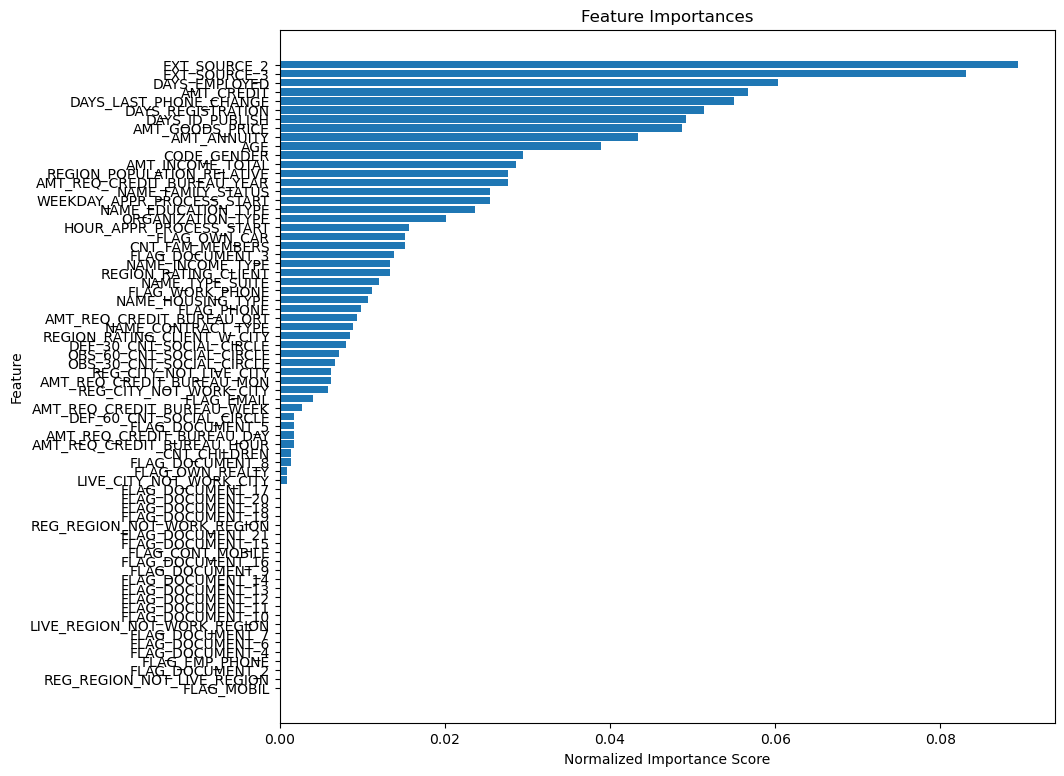

,Feature,Importance
36,EXT_SOURCE_2,0.0894
37,EXT_SOURCE_3,0.0831
15,DAYS_EMPLOYED,0.0603
6,AMT_CREDIT,0.0567
42,DAYS_LAST_PHONE_CHANGE,0.0550
16,DAYS_REGISTRATION,0.0514
17,DAYS_ID_PUBLISH,0.0492
8,AMT_GOODS_PRICE,0.0487
7,AMT_ANNUITY,0.0433
69,AGE,0.0389


In [160]:
importances = best_lgb_model.feature_importances_


importances = importances / importances.sum()

importance_df = pd.DataFrame({
        'Feature':  X_train_nb.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


importance_df

In [162]:
important_features_df = importance_df[importance_df['Importance'] > 0.03]

print("Features with Importance > 3%:")
important_features_df

Features with Importance > 3%:


,Feature,Importance
36,EXT_SOURCE_2,0.0894
37,EXT_SOURCE_3,0.0831
15,DAYS_EMPLOYED,0.0603
6,AMT_CREDIT,0.0567
42,DAYS_LAST_PHONE_CHANGE,0.0550
16,DAYS_REGISTRATION,0.0514
17,DAYS_ID_PUBLISH,0.0492
8,AMT_GOODS_PRICE,0.0487
7,AMT_ANNUITY,0.0433
69,AGE,0.0389


In [164]:
important_features_df.Feature.tolist()

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'AGE']

C:\Users\admin\anaconda3\Lib\site-packages\shap\explainers\_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


SHAP Values Summary (Selected Features)


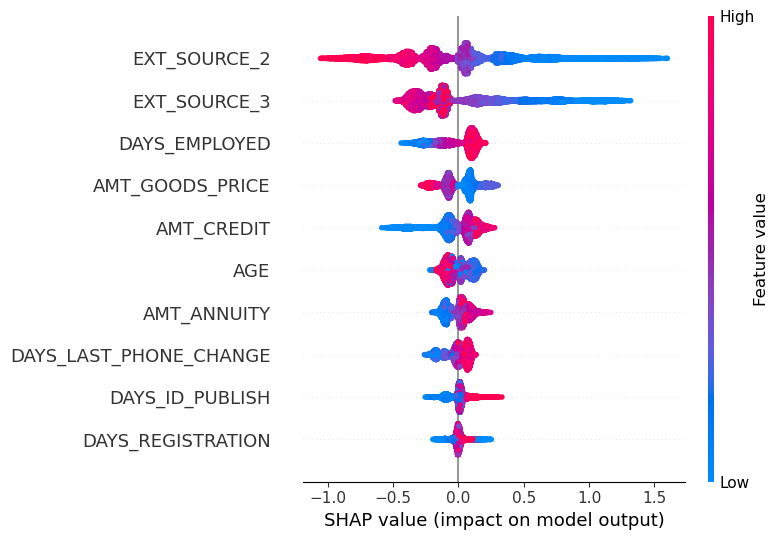

In [168]:
import shap

selected_features = ['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'AGE']





explainer = shap.TreeExplainer(best_lgb_model)
shap_values = explainer.shap_values(X_train_nb)


shap_df = pd.DataFrame(shap_values, columns=X_train_nb.columns)
shap_selected = shap_df[selected_features]
X_selected = X_train_nb[selected_features]


print("SHAP Values Summary (Selected Features)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_selected.values, X_selected, show=False)
plt.tight_layout()
plt.show()

In [170]:
train_and_evaluate_model('LGB_importance', best_lgb_model, X_train_nb [['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'AGE']]
, y_train, X_test_nb[['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'AGE'] ]
, y_test)




[LightGBM] [Info] Number of positive: 2019, number of negative: 22581
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2330
[LightGBM] [Info] Number of data points in the train set: 24600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082073 -> initscore=-2.414507
[LightGBM] [Info] Start training from score -2.414507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[0.5484764889872327, 0.44356821801451063]

In [172]:
from sklearn.ensemble import VotingClassifier

In [178]:
inputs_vot = nb_data_sample.drop('TARGET', axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs_vot, output, test_size=0.3, random_state=42)

In [180]:
lr_model_vot = LogisticRegression()

In [182]:
# RF

from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
    'n_estimators': trial.suggest_int('n_estimators', 10, 1000), 
    'max_features': trial.suggest_categorical('max_features', ['log2', 'sqrt']),  
    'max_depth': trial.suggest_int('max_depth', 10, 50),  
    'min_samples_split': trial.suggest_int('min_samples_split', 10, 200),  
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 50),  
}

    rf_clf = RandomForestClassifier(**param)

    roc = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=35)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model_vot = RandomForestClassifier(**best_params)

[I 2025-11-19 20:54:41,731] A new study created in memory with name: no-name-e422feab-1f92-4586-8e13-c879722a568c
[I 2025-11-19 20:55:38,225] Trial 0 finished with value: 0.7288177199528644 and parameters: {'n_estimators': 774, 'max_features': 'sqrt', 'max_depth': 35, 'min_samples_split': 67, 'min_samples_leaf': 26}. Best is trial 0 with value: 0.7288177199528644.
[I 2025-11-19 20:55:51,026] Trial 1 finished with value: 0.720555058719847 and parameters: {'n_estimators': 188, 'max_features': 'log2', 'max_depth': 26, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7288177199528644.
[I 2025-11-19 20:56:34,468] Trial 2 finished with value: 0.7297907936751905 and parameters: {'n_estimators': 812, 'max_features': 'log2', 'max_depth': 26, 'min_samples_split': 124, 'min_samples_leaf': 35}. Best is trial 2 with value: 0.7297907936751905.
[I 2025-11-19 20:56:36,114] Trial 3 finished with value: 0.7116506216096881 and parameters: {'n_estimators': 20, 'max_features':

Best trial:
  Value: 0.731
  Params:  {'n_estimators': 654, 'max_features': 'sqrt', 'max_depth': 24, 'min_samples_split': 90, 'min_samples_leaf': 40}


In [184]:
# Catboost

def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=2)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model_vot = CatBoostClassifier(**best_params)

[I 2025-11-19 21:13:51,423] A new study created in memory with name: no-name-9672b322-bab1-4b26-9a95-c0dbb6814985
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\1063359441.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\1063359441.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2025-11-19 21:16:39,906] Trial 0 finished with value: 0.6888011130964843 and parameters: {'iterations': 546, 'learning_rate': 0.08670293509833363, 'depth': 10, 'l2_leaf_reg': 1.668016060419386, 'loss

Best trial:
  Value: 0.740
  Params:  {'iterations': 987, 'learning_rate': 0.010164387497014388, 'depth': 4, 'l2_leaf_reg': 0.708087080120756, 'loss_function': 'Logloss'}


In [188]:
# Catboost Cat

def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
         'cat_features': object_columns,  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=2)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cbc_model_vot = CatBoostClassifier(**best_params)

[I 2025-11-19 21:17:36,689] A new study created in memory with name: no-name-e9abf366-a3a2-40f3-a09a-f6c42289fa12
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\676413062.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\admin\AppData\Local\Temp\ipykernel_10528\676413062.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2025-11-19 21:21:20,234] Trial 0 finished with value: 0.7245237779547695 and parameters: {'iterations': 782, 'learning_rate': 0.04383909439254346, 'depth': 7, 'l2_leaf_reg': 0.7921772448309427, 'loss_f

Best trial:
  Value: 0.725
  Params:  {'iterations': 782, 'learning_rate': 0.04383909439254346, 'depth': 7, 'l2_leaf_reg': 0.7921772448309427, 'loss_function': 'Logloss'}


In [190]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', lr_model_vot),
        ('rf', best_rf_model_vot),
        ('cat', best_cb_model_vot),
        ('cbc', best_cbc_model_vot)
    ],
    voting='hard' 
)

In [192]:
from sklearn.metrics import classification_report

def train_and_evaluate_model_voting_hard(model_name, model, X_train, y_train, X_test, y_test):
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Classification reports as dicts
        train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
        test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Convert to DataFrames
        train_report_df = pd.DataFrame(train_report_dict).transpose()
        test_report_df = pd.DataFrame(test_report_dict).transpose()

        # Add model info
        train_report_df["Dataset"] = "Train"
        train_report_df["Model"] = model_name

        test_report_df["Dataset"] = "Test"
        test_report_df["Model"] = model_name

        # Combine into one dataframe
        final_df = pd.concat([train_report_df, test_report_df], axis=0)

        return final_df

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [194]:
train_and_evaluate_model_voting_hard('Voting model', voting_clf_hard, X_train, y_train, X_test, y_test)


Training Voting model...


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 0.6828218	total: 7.28ms	remaining: 7.18s
1:	learn: 0.6722303	total: 14.2ms	remaining: 7.01s
2:	learn: 0.6625367	total: 21.7ms	remaining: 7.1s
3:	learn: 0.6529258	total: 29.8ms	remaining: 7.32s
4:	learn: 0.6435479	total: 37.5ms	remaining: 7.37s
5:	learn: 0.6343057	total: 44.6ms	remaining: 7.29s
6:	learn: 0.6252215	total: 52.4ms	remaining: 7.33s
7:	learn: 0.6164420	total: 60.4ms	remaining: 7.39s
8:	learn: 0.6074006	total: 67.3ms	remaining: 7.32s
9:	learn: 0.5993095	total: 74.3ms	remaining: 7.26s
10:	learn: 0.5909392	total: 82.2ms	remaining: 7.3s
11:	learn: 0.5831176	total: 89.2ms	remaining: 7.25s
12:	learn: 0.5755541	total: 96.8ms	remaining: 7.25s
13:	learn: 0.5681982	total: 104ms	remaining: 7.22s
14:	learn: 0.5609894	total: 111ms	remaining: 7.21s
15:	learn: 0.5540435	total: 118ms	remaining: 7.19s
16:	learn: 0.5472362	total: 126ms	remaining: 7.17s
17:	learn: 0.5404886	total: 133ms	remaining: 7.17s
18:	learn: 0.5339495	total: 140ms	remaining: 7.13s
19:	learn: 0.5275435	total: 14

,precision,recall,f1-score,support,Dataset,Model
0,0.9179,1.0000,0.9572,19756.0000,Train,Voting model
1,1.0000,0.0017,0.0034,1769.0000,Train,Voting model
accuracy,0.9180,0.9180,0.9180,0.9180,Train,Voting model
macro avg,0.9590,0.5008,0.4803,21525.0000,Train,Voting model
weighted avg,0.9247,0.9180,0.8788,21525.0000,Train,Voting model
0,0.9188,1.0000,0.9577,8476.0000,Test,Voting model
1,1.0000,0.0013,0.0027,750.0000,Test,Voting model
accuracy,0.9188,0.9188,0.9188,0.9188,Test,Voting model
macro avg,0.9594,0.5007,0.4802,9226.0000,Test,Voting model
weighted avg,0.9254,0.9188,0.8801,9226.0000,Test,Voting model


In [196]:
voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', lr_model_vot),
        ('rf', best_rf_model_vot),
        ('cat', best_cb_model_vot),
        ('cbc', best_cbc_model_vot)
    ],
    voting='soft' 
)

In [198]:
train_and_evaluate_model('Voting model', voting_clf_soft, X_train, y_train, X_test, y_test)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 0.6828218	total: 7.46ms	remaining: 7.35s
1:	learn: 0.6722303	total: 14.4ms	remaining: 7.11s
2:	learn: 0.6625367	total: 21.4ms	remaining: 7.02s
3:	learn: 0.6529258	total: 29.1ms	remaining: 7.15s
4:	learn: 0.6435479	total: 36.8ms	remaining: 7.24s
5:	learn: 0.6343057	total: 44.6ms	remaining: 7.29s
6:	learn: 0.6252215	total: 52.9ms	remaining: 7.4s
7:	learn: 0.6164420	total: 60.8ms	remaining: 7.43s
8:	learn: 0.6074006	total: 68ms	remaining: 7.39s
9:	learn: 0.5993095	total: 74.9ms	remaining: 7.32s
10:	learn: 0.5909392	total: 82.4ms	remaining: 7.31s
11:	learn: 0.5831176	total: 89.7ms	remaining: 7.29s
12:	learn: 0.5755541	total: 97.4ms	remaining: 7.3s
13:	learn: 0.5681982	total: 108ms	remaining: 7.51s
14:	learn: 0.5609894	total: 117ms	remaining: 7.58s
15:	learn: 0.5540435	total: 124ms	remaining: 7.53s
16:	learn: 0.5472362	total: 132ms	remaining: 7.54s
17:	learn: 0.5404886	total: 140ms	remaining: 7.52s
18:	learn: 0.5339495	total: 147ms	remaining: 7.5s
19:	learn: 0.5275435	total: 154ms

[0.834894360148017, 0.48420512820512807]

In [200]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', best_rf_model_vot),
    ('cbc', best_cbc_model_vot),
    ('cat', best_cb_model_vot)
]

estimators

[('rf',
  RandomForestClassifier(max_depth=24, min_samples_leaf=40, min_samples_split=90,
                         n_estimators=654)),
 ('cat custom', <catboost.core.CatBoostClassifier at 0x2ab0e864f50>),
 ('cat', <catboost.core.CatBoostClassifier at 0x2ab1e3218e0>)]

In [202]:
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=lr_model_vot,
    passthrough=True,   # if True, raw features are also passed to final estimator
    cv=5,                
    stack_method='predict_proba'  # ensures probabilities are passed
)

stack_clf

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=24,
                                                       min_samples_leaf=40,
                                                       min_samples_split=90,
                                                       n_estimators=654)),
                               ('cat custom',
                                <catboost.core.CatBoostClassifier object at 0x000002AB0E864F50>),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x000002AB1E3218E0>)],
                   final_estimator=LogisticRegression(), passthrough=True,
                   stack_method='predict_proba')

In [204]:
train_and_evaluate_model('Stacking model', stack_clf, X_train, y_train, X_test, y_test)

0:	learn: 0.6495464	total: 13.5ms	remaining: 10.6s
1:	learn: 0.6103596	total: 25.6ms	remaining: 9.97s
2:	learn: 0.5748789	total: 38.4ms	remaining: 9.97s
3:	learn: 0.5420695	total: 51.3ms	remaining: 9.98s
4:	learn: 0.5139237	total: 64.1ms	remaining: 9.96s
5:	learn: 0.4888679	total: 76.7ms	remaining: 9.92s
6:	learn: 0.4671618	total: 88.8ms	remaining: 9.83s
7:	learn: 0.4450976	total: 102ms	remaining: 9.84s
8:	learn: 0.4254719	total: 115ms	remaining: 9.87s
9:	learn: 0.4090966	total: 127ms	remaining: 9.81s
10:	learn: 0.3939805	total: 140ms	remaining: 9.81s
11:	learn: 0.3807099	total: 152ms	remaining: 9.75s
12:	learn: 0.3691060	total: 160ms	remaining: 9.45s
13:	learn: 0.3576489	total: 172ms	remaining: 9.45s
14:	learn: 0.3487296	total: 185ms	remaining: 9.48s
15:	learn: 0.3399183	total: 198ms	remaining: 9.48s
16:	learn: 0.3322183	total: 210ms	remaining: 9.46s
17:	learn: 0.3254641	total: 227ms	remaining: 9.63s
18:	learn: 0.3194300	total: 248ms	remaining: 9.95s
19:	learn: 0.3136722	total: 267ms	

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance for Stacking model
Train Gini prob is 41.379441967583965
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     19756
           1       0.60      0.00      0.00      1769

    accuracy                           0.92     21525
   macro avg       0.76      0.50      0.48     21525
weighted avg       0.89      0.92      0.88     21525

[[19754     2]
 [ 1766     3]]
Model Performance for Stacking model
Test Gini prob is 41.77744218971213
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8476
           1       0.80      0.01      0.01       750

    accuracy                           0.92      9226
   macro avg       0.86      0.50      0.48      9226
weighted avg       0.91      0.92      0.88      9226

[[8475    1]
 [ 746    4]]


[0.41379441967583963, 0.41777442189712133]